## Problem 1: Linear Regression

The comp-activ databases is a collection of a computer systems activity measures .
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 

As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.

### DATA DICTIONARY:
-----------------------
System measures used:

- lread - Reads (transfers per second ) between system memory and user memory
- lwrite - writes (transfers per second) between system memory and user memory
- scall - Number of system calls of all types per second
- sread - Number of system read calls per second .
- swrite - Number of system write calls per second .
- fork - Number of system fork calls per second.
- exec - Number of system exec calls per second.
- rchar - Number of characters transferred per second by system read calls
- wchar - Number of characters transfreed per second by system write calls
- pgout - Number of page out requests per second
- ppgout - Number of pages, paged out per second
- pgfree - Number of pages per second placed on the free list.
- pgscan - Number of pages checked if they can be freed per second
- atch - Number of page attaches (satisfying a page fault by reclaiming a page in memory) per second
- pgin - Number of page-in requests per second
- ppgin - Number of pages paged in per second
- pflt - Number of page faults caused by protection errors (copy-on-writes).
- vflt - Number of page faults caused by address translation .
- runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.
- Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)
- freemem - Number of memory pages available to user processes
- freeswap - Number of disk blocks available for page swapping.
------------------------
**usr - Portion of time (%) that cpus run in user mode**

### Importing libraries

In [1]:
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# To Avoiding warnings
from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline


# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

### 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [2]:
comp_activ = pd.read_excel('compactiv.xlsx')

In [3]:
comp_activ.head(10)

lread  lwrite  scall  sread  swrite  fork  exec    rchar     wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0   53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0    8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN   31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN    8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN   12185.0    0.0   
5      0       0   1201     65      61   0.4   0.4      NaN   58703.0    0.0   
6      1       0   5744    168     190   0.2   0.2      NaN  189975.0    6.0   
7     21      18   2799    291     211   0.6   0.4      NaN  259868.0    2.6   
8      0       0    264     42      33   0.2   0.2      NaN   10116.0    0.0   
9      0       0    188     13      24   0.2   0.2      NaN    6777.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   
5  ...     0.0   0.0   0.0    0.0   28.40   34.40  Not_CPU_Bound     6854   
6  ...     0.0   4.4   0.6    0.6   27.40   28.60  Not_CPU_Bound      312   
7  ...     0.0   0.0   1.0    1.0   35.40   71.00      CPU_Bound       87   
8  ...     0.0   0.0   0.4    0.8   15.63   18.44  Not_CPU_Bound     1374   
9  ...     0.0   0.0   0.0    0.0   15.60   16.80  Not_CPU_Bound     5310   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  
5  1877461   96  
6  1013458   89  
7       13    0  
8  1749756   98  
9  1859912   98  

[10 rows x 22 columns]

In [4]:
comp_activ.tail(10)

lread  lwrite  scall  sread  swrite   fork   exec     rchar     wchar  \
8182     10       0   5975    692     612   2.20   2.00  505718.0  475455.0   
8183      4       3   1509    501     139   0.60   1.00  312242.0  255308.0   
8184      8       2   4784    416     240   1.20   1.60  442876.0  110453.0   
8185     13       0   4279    235     176  12.22  34.47  289309.0   30701.0   
8186      0       0    300     56      46   0.20   0.20    1995.0   18052.0   
8187     16      12   3009    360     244   1.60   5.81  405250.0   85282.0   
8188      4       0   1596    170     146   2.40   1.80   89489.0   41764.0   
8189     16       5   3116    289     190   0.60   0.60  325948.0   52640.0   
8190     32      45   5180    254     179   1.20   1.20   62571.0   29505.0   
8191      2       0    985     55      46   1.60   4.80  111111.0   22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8182   5.99  ...  122.55  0.40  24.15  72.85   95.21  230.54  Not_CPU_Bound   
8183   0.00  ...    0.00  0.00   3.20   3.20   52.60  119.60      CPU_Bound   
8184   7.82  ...  129.06  0.40  35.27  48.70  106.81  329.86      CPU_Bound   
8185   0.40  ...    7.01  8.82   4.21   4.21  397.60  751.30  Not_CPU_Bound   
8186   0.80  ...    0.00  0.00   0.00   0.00   21.00   18.00  Not_CPU_Bound   
8187   8.02  ...   55.11  0.60  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20  0.80   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00  0.40  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04  0.40  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00  0.20   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8182      126  1039337   77  
8183     1051  1600333   92  
8184      205  1011407   77  
8185      184  1079269   61  
8186      272  1754832   97  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[10 rows x 22 columns]

In [5]:
comp_activ.shape

(8192, 22)

In [6]:
comp_activ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

### Check Duplicate value

In [7]:
comp_activ.duplicated().sum()

0

### Check Null-value

In [8]:
comp_activ.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [9]:
comp_activ.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

### Perform Univariate, Bivariate Analysis, Multivariate Analysis for Numerical Data

In [10]:
# Selecting only numerical columns
numerical_columns = comp_activ.select_dtypes(include=['int64', 'float64'])

# Summary statistics
summary_stats = numerical_columns.describe()

### Histograms for numerical columns

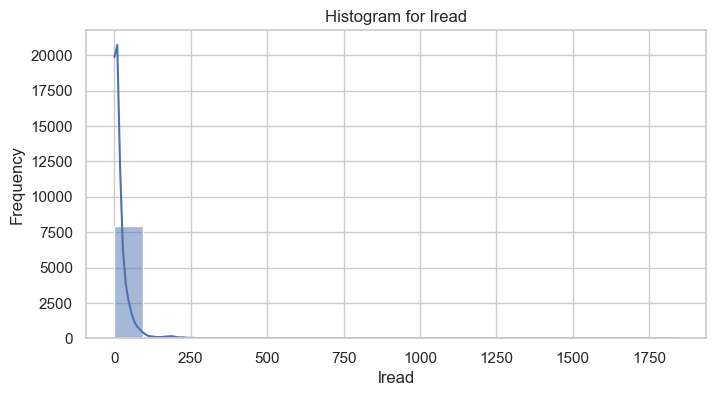

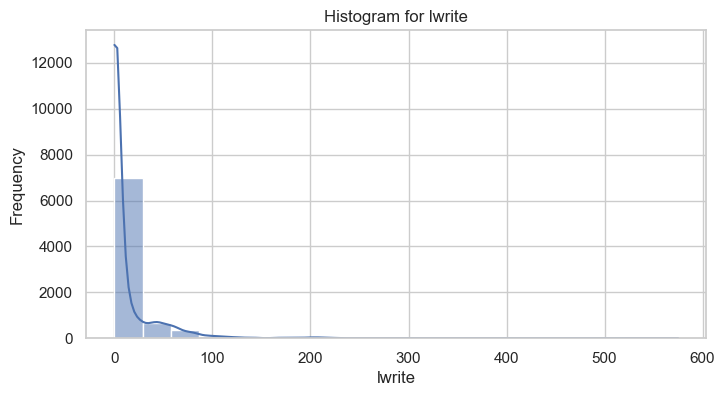

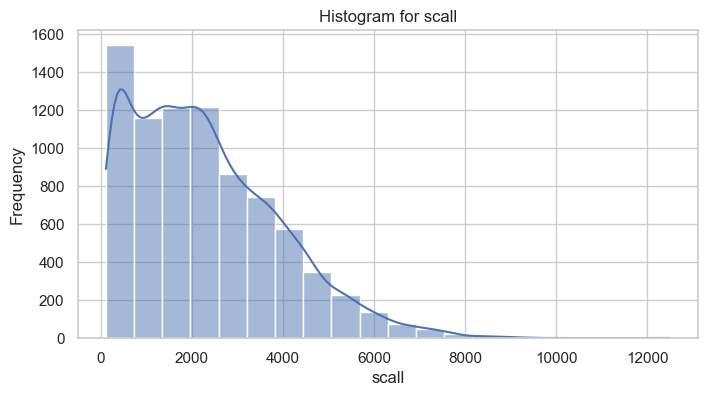

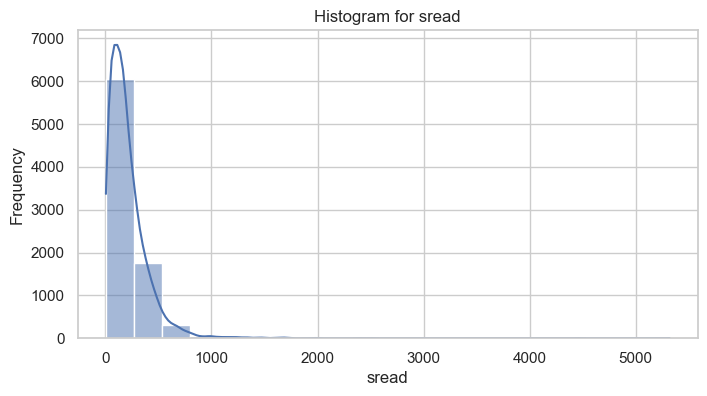

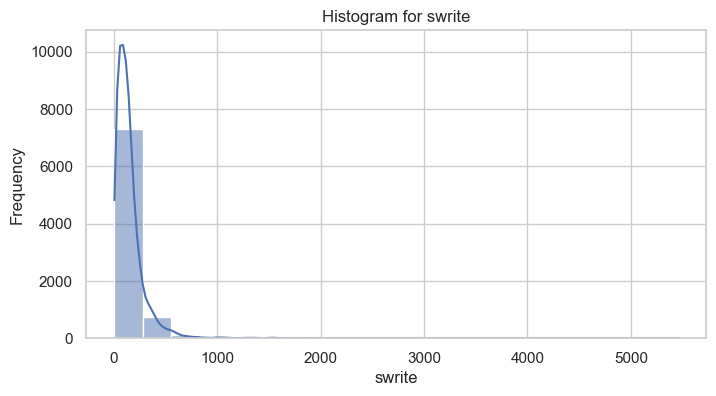

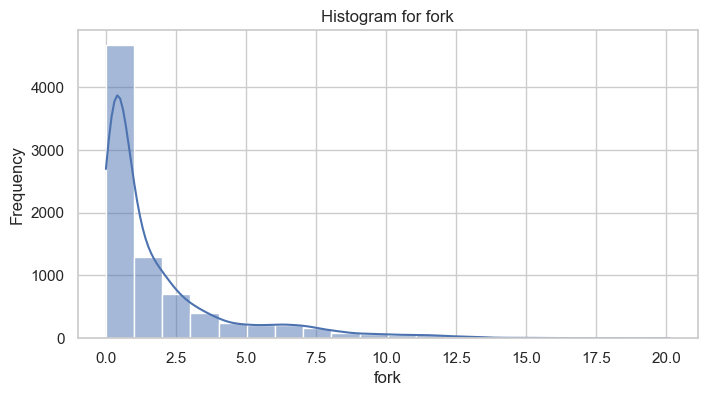

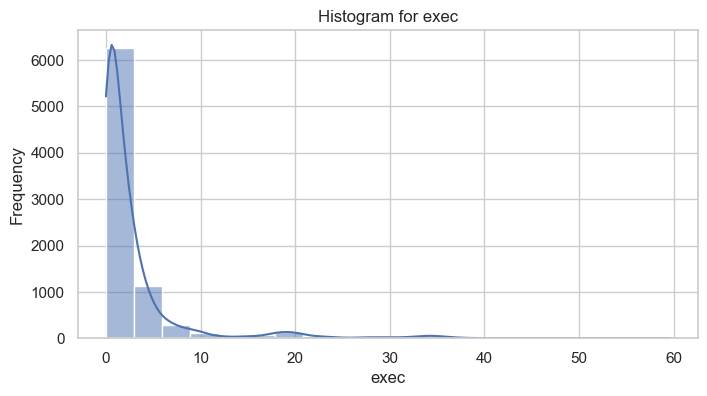

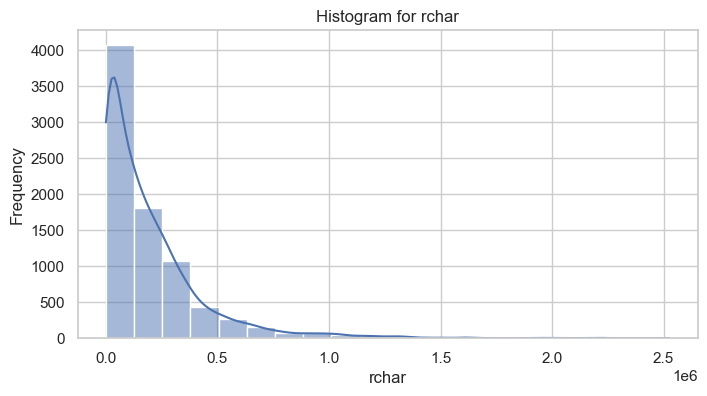

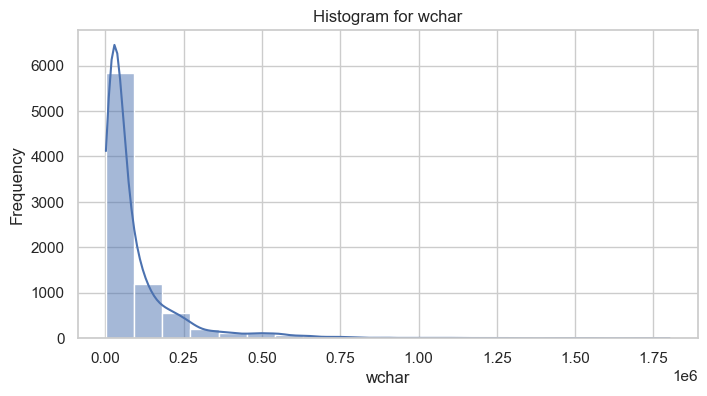

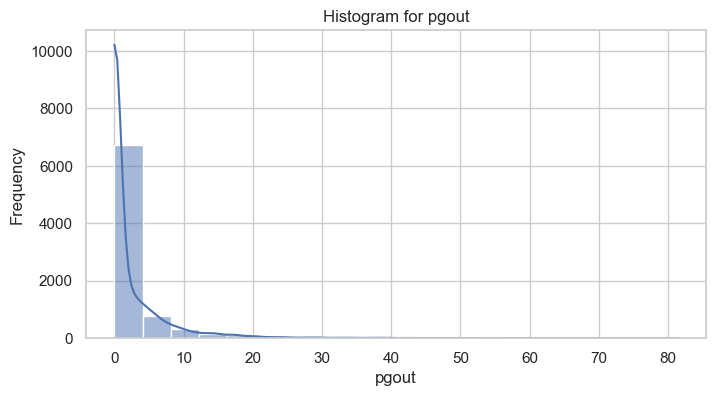

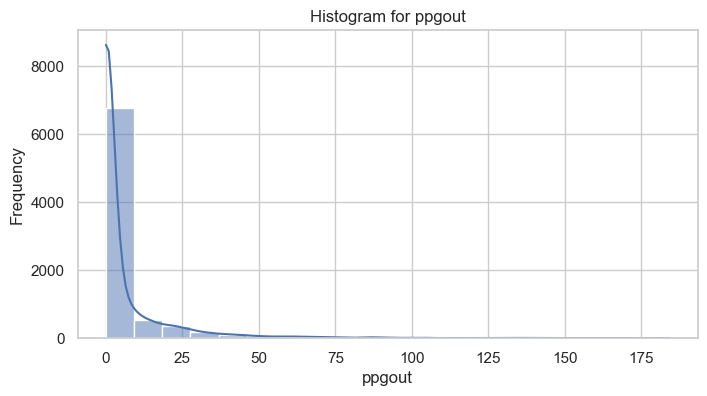

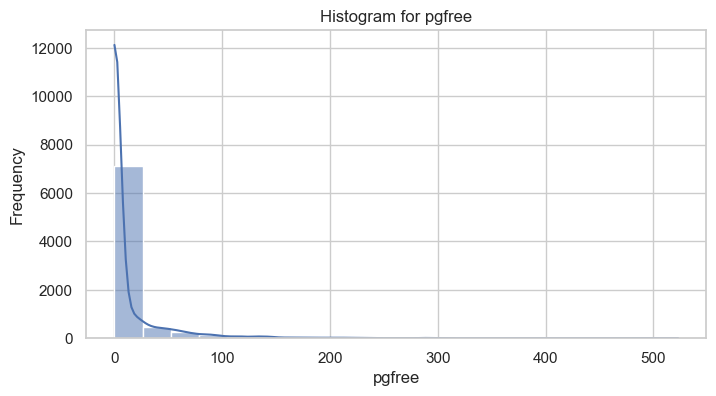

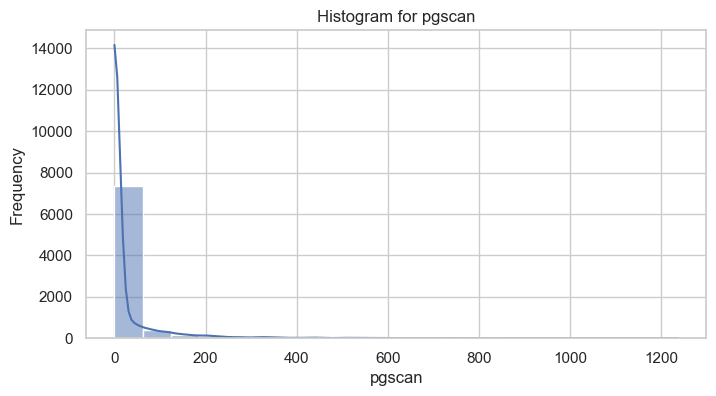

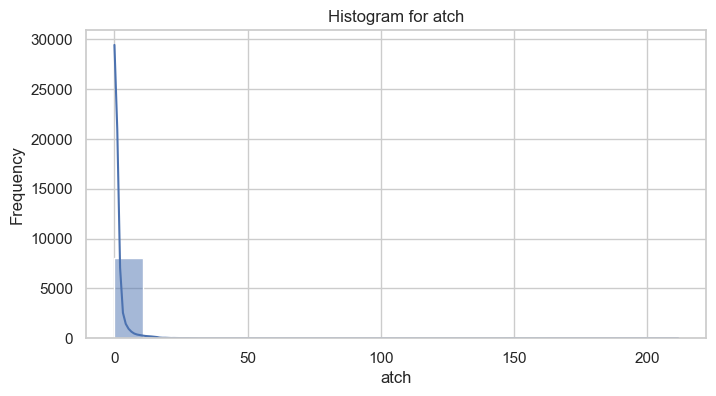

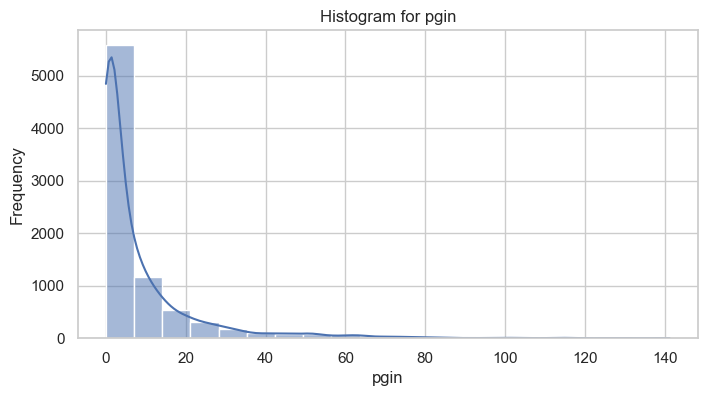

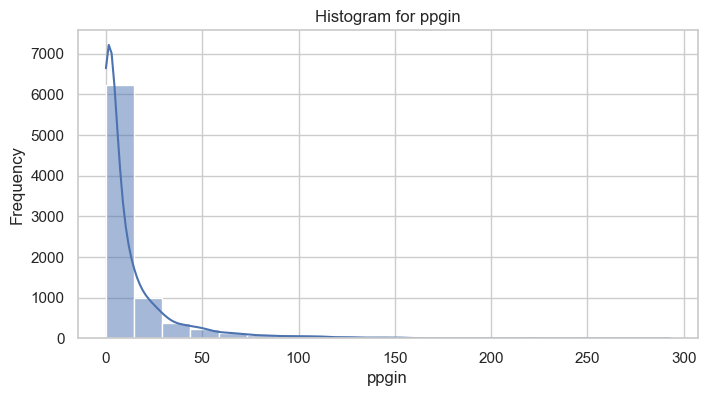

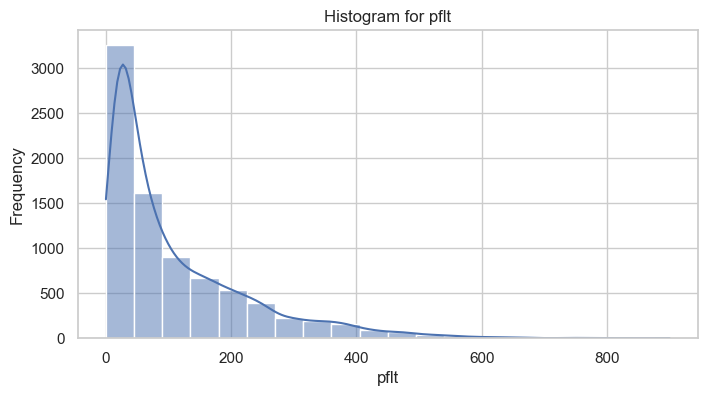

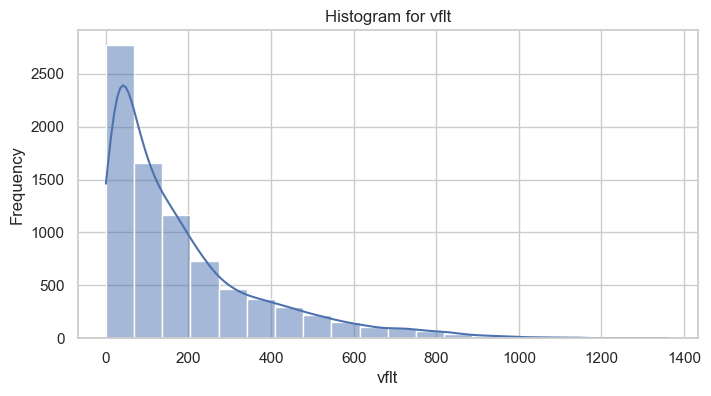

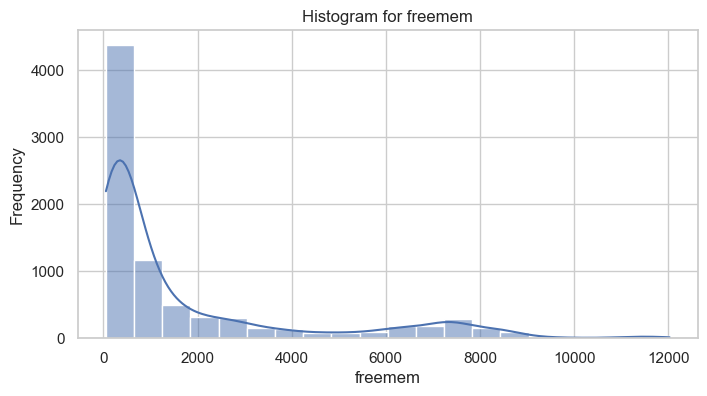

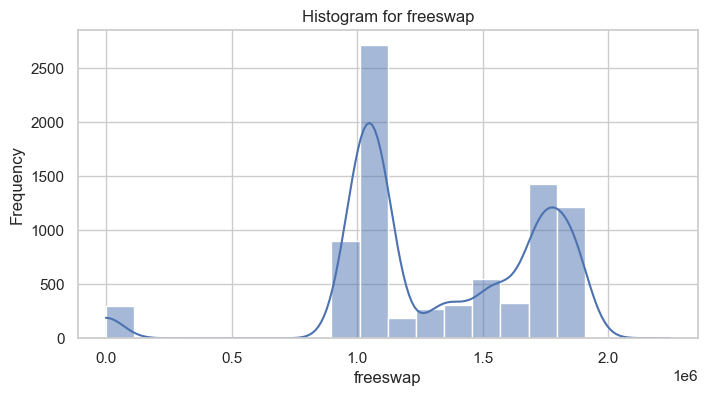

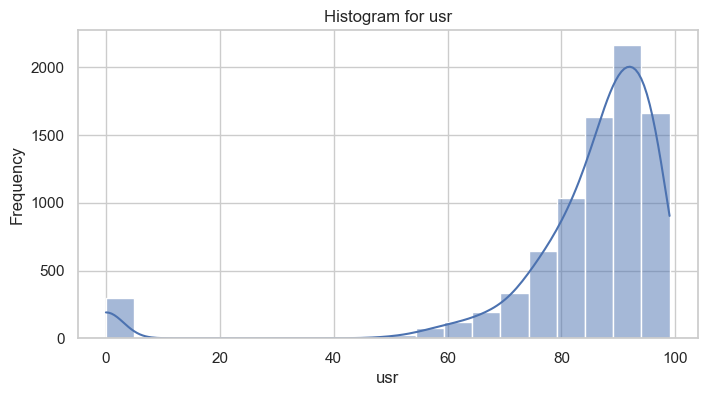

In [11]:
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=comp_activ, x=column, bins=20, kde=True)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Box plots for numerical columns

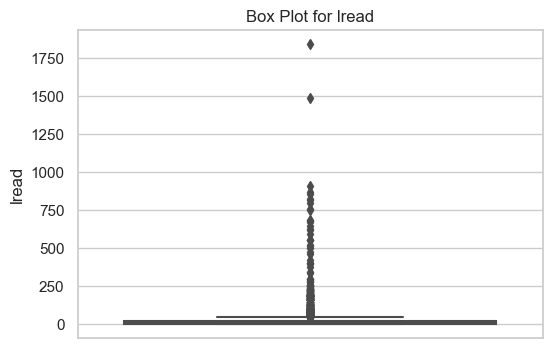

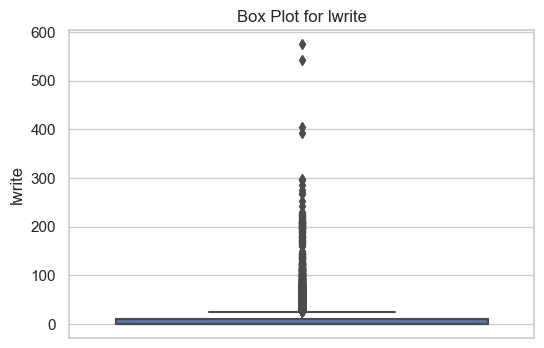

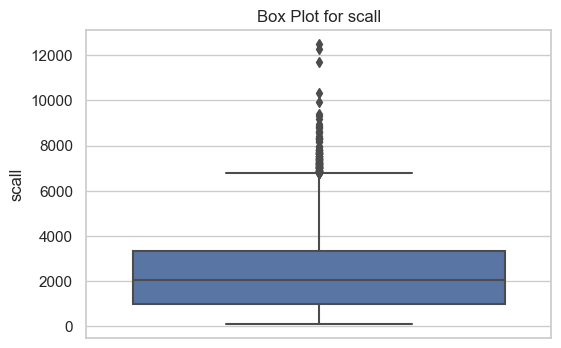

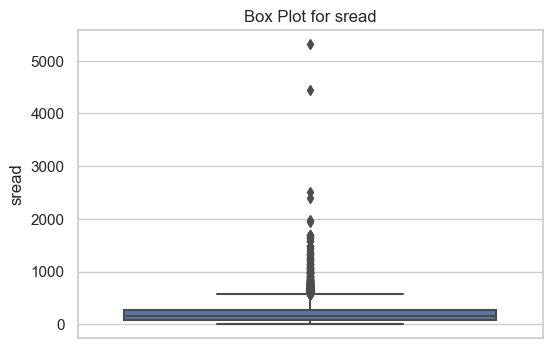

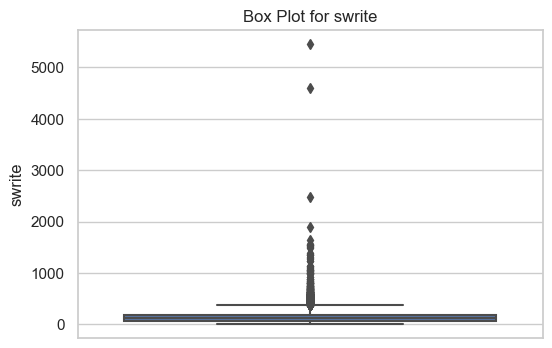

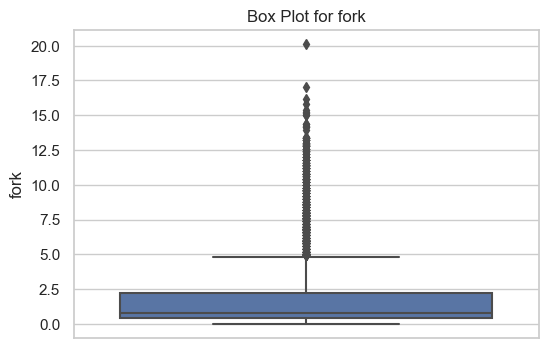

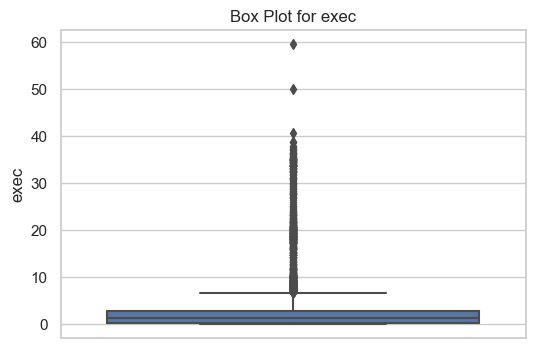

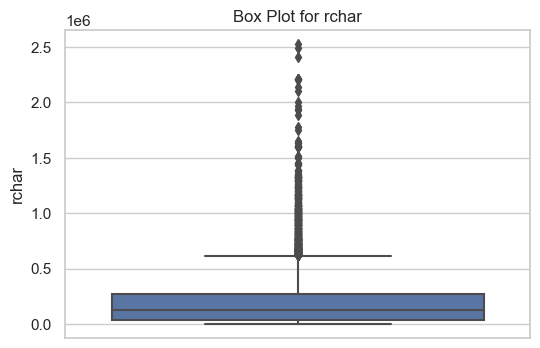

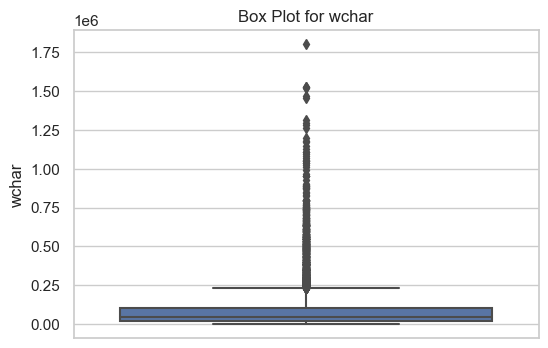

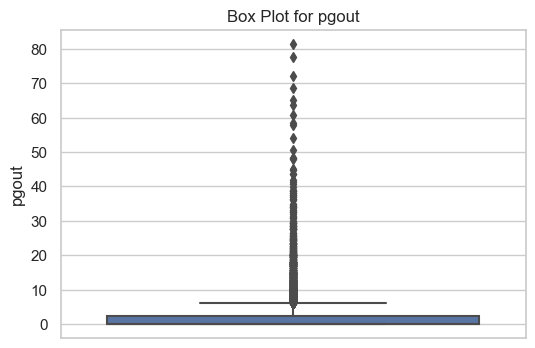

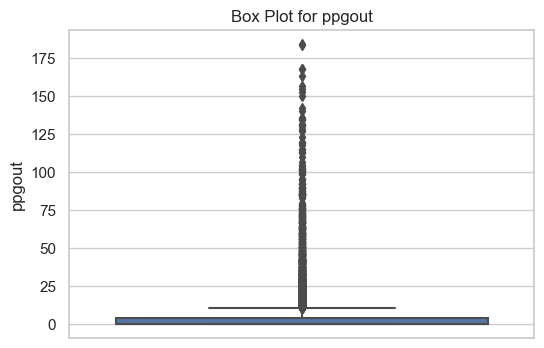

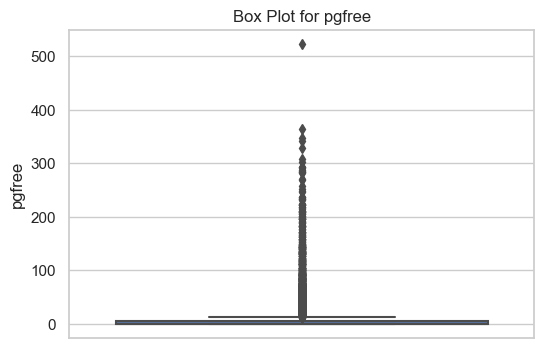

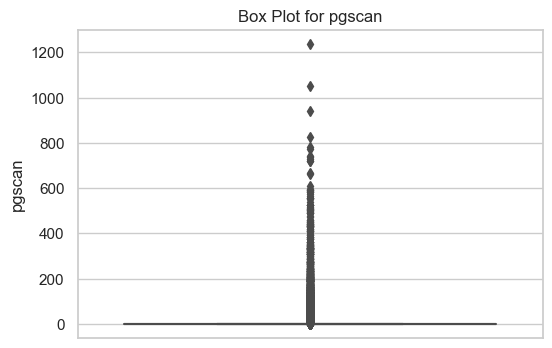

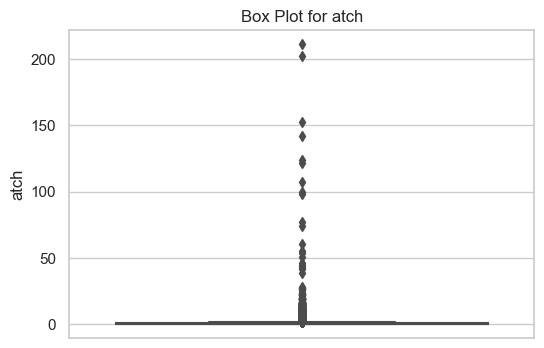

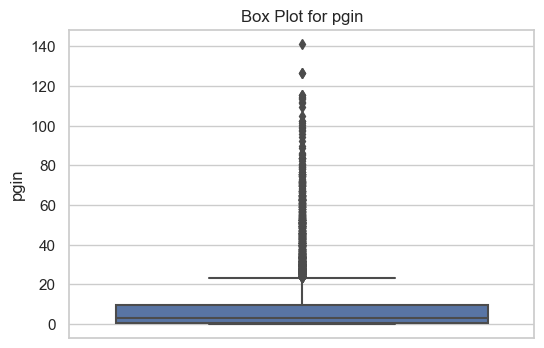

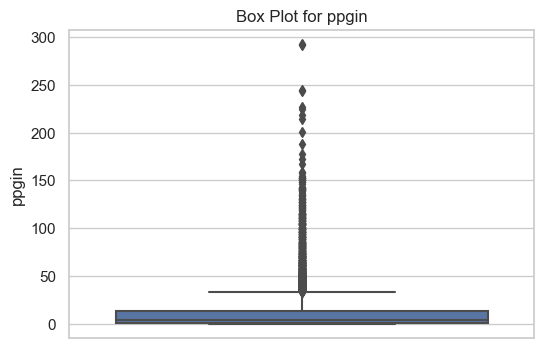

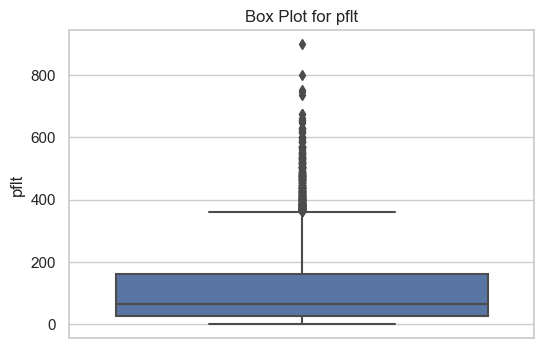

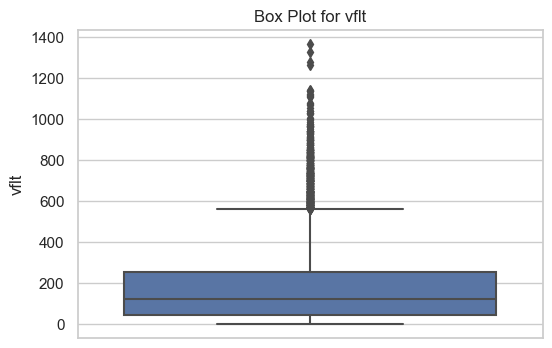

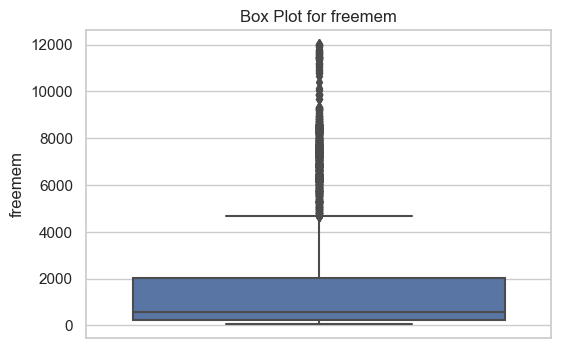

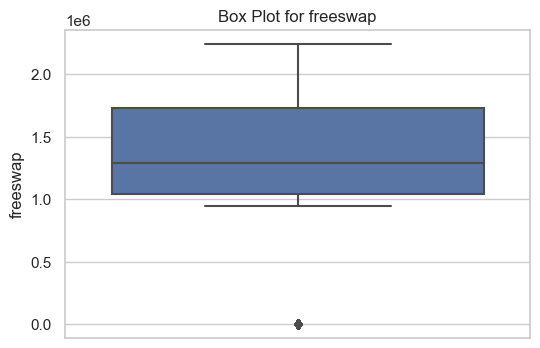

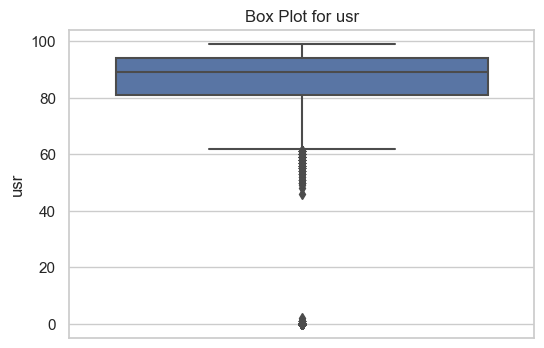

In [12]:
for column in numerical_columns.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=comp_activ, y=column)
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.show()

### Correlation matrix heatmap (for all numerical columns)

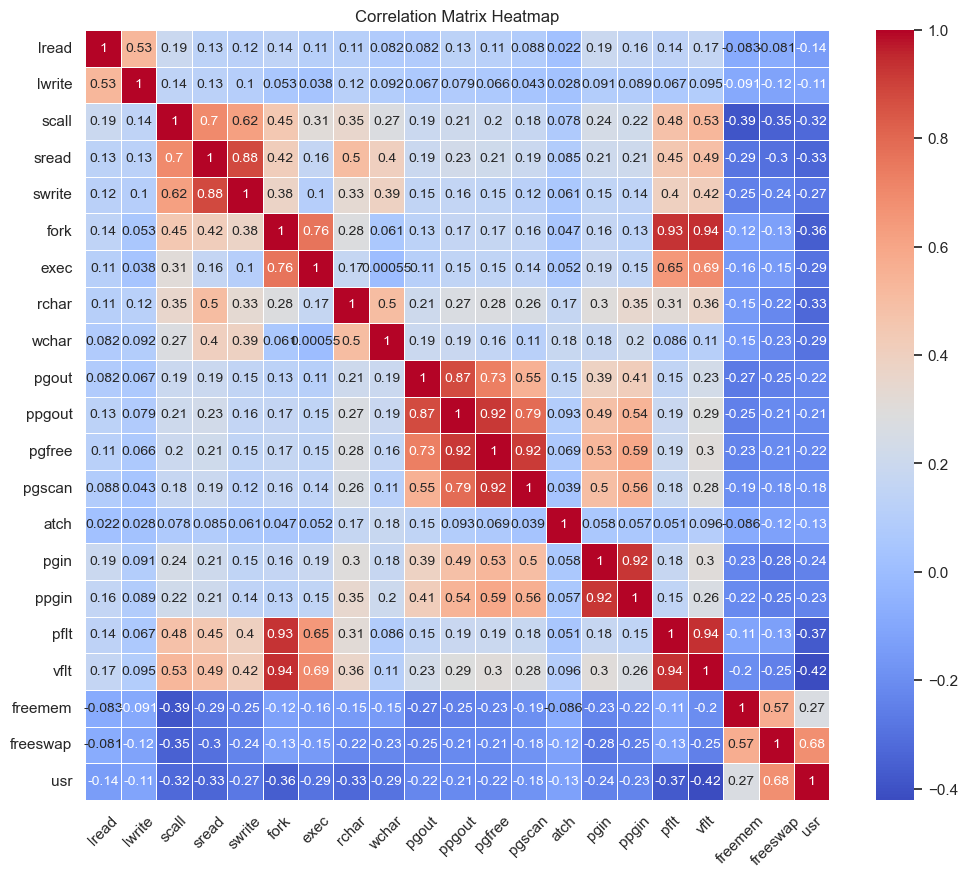

In [13]:
# Correlation matrix heatmap (for all numerical columns)
correlation_matrix = numerical_columns.corr()

# Increase the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap with larger font size for annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})

# Rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()

### Create a pair plot

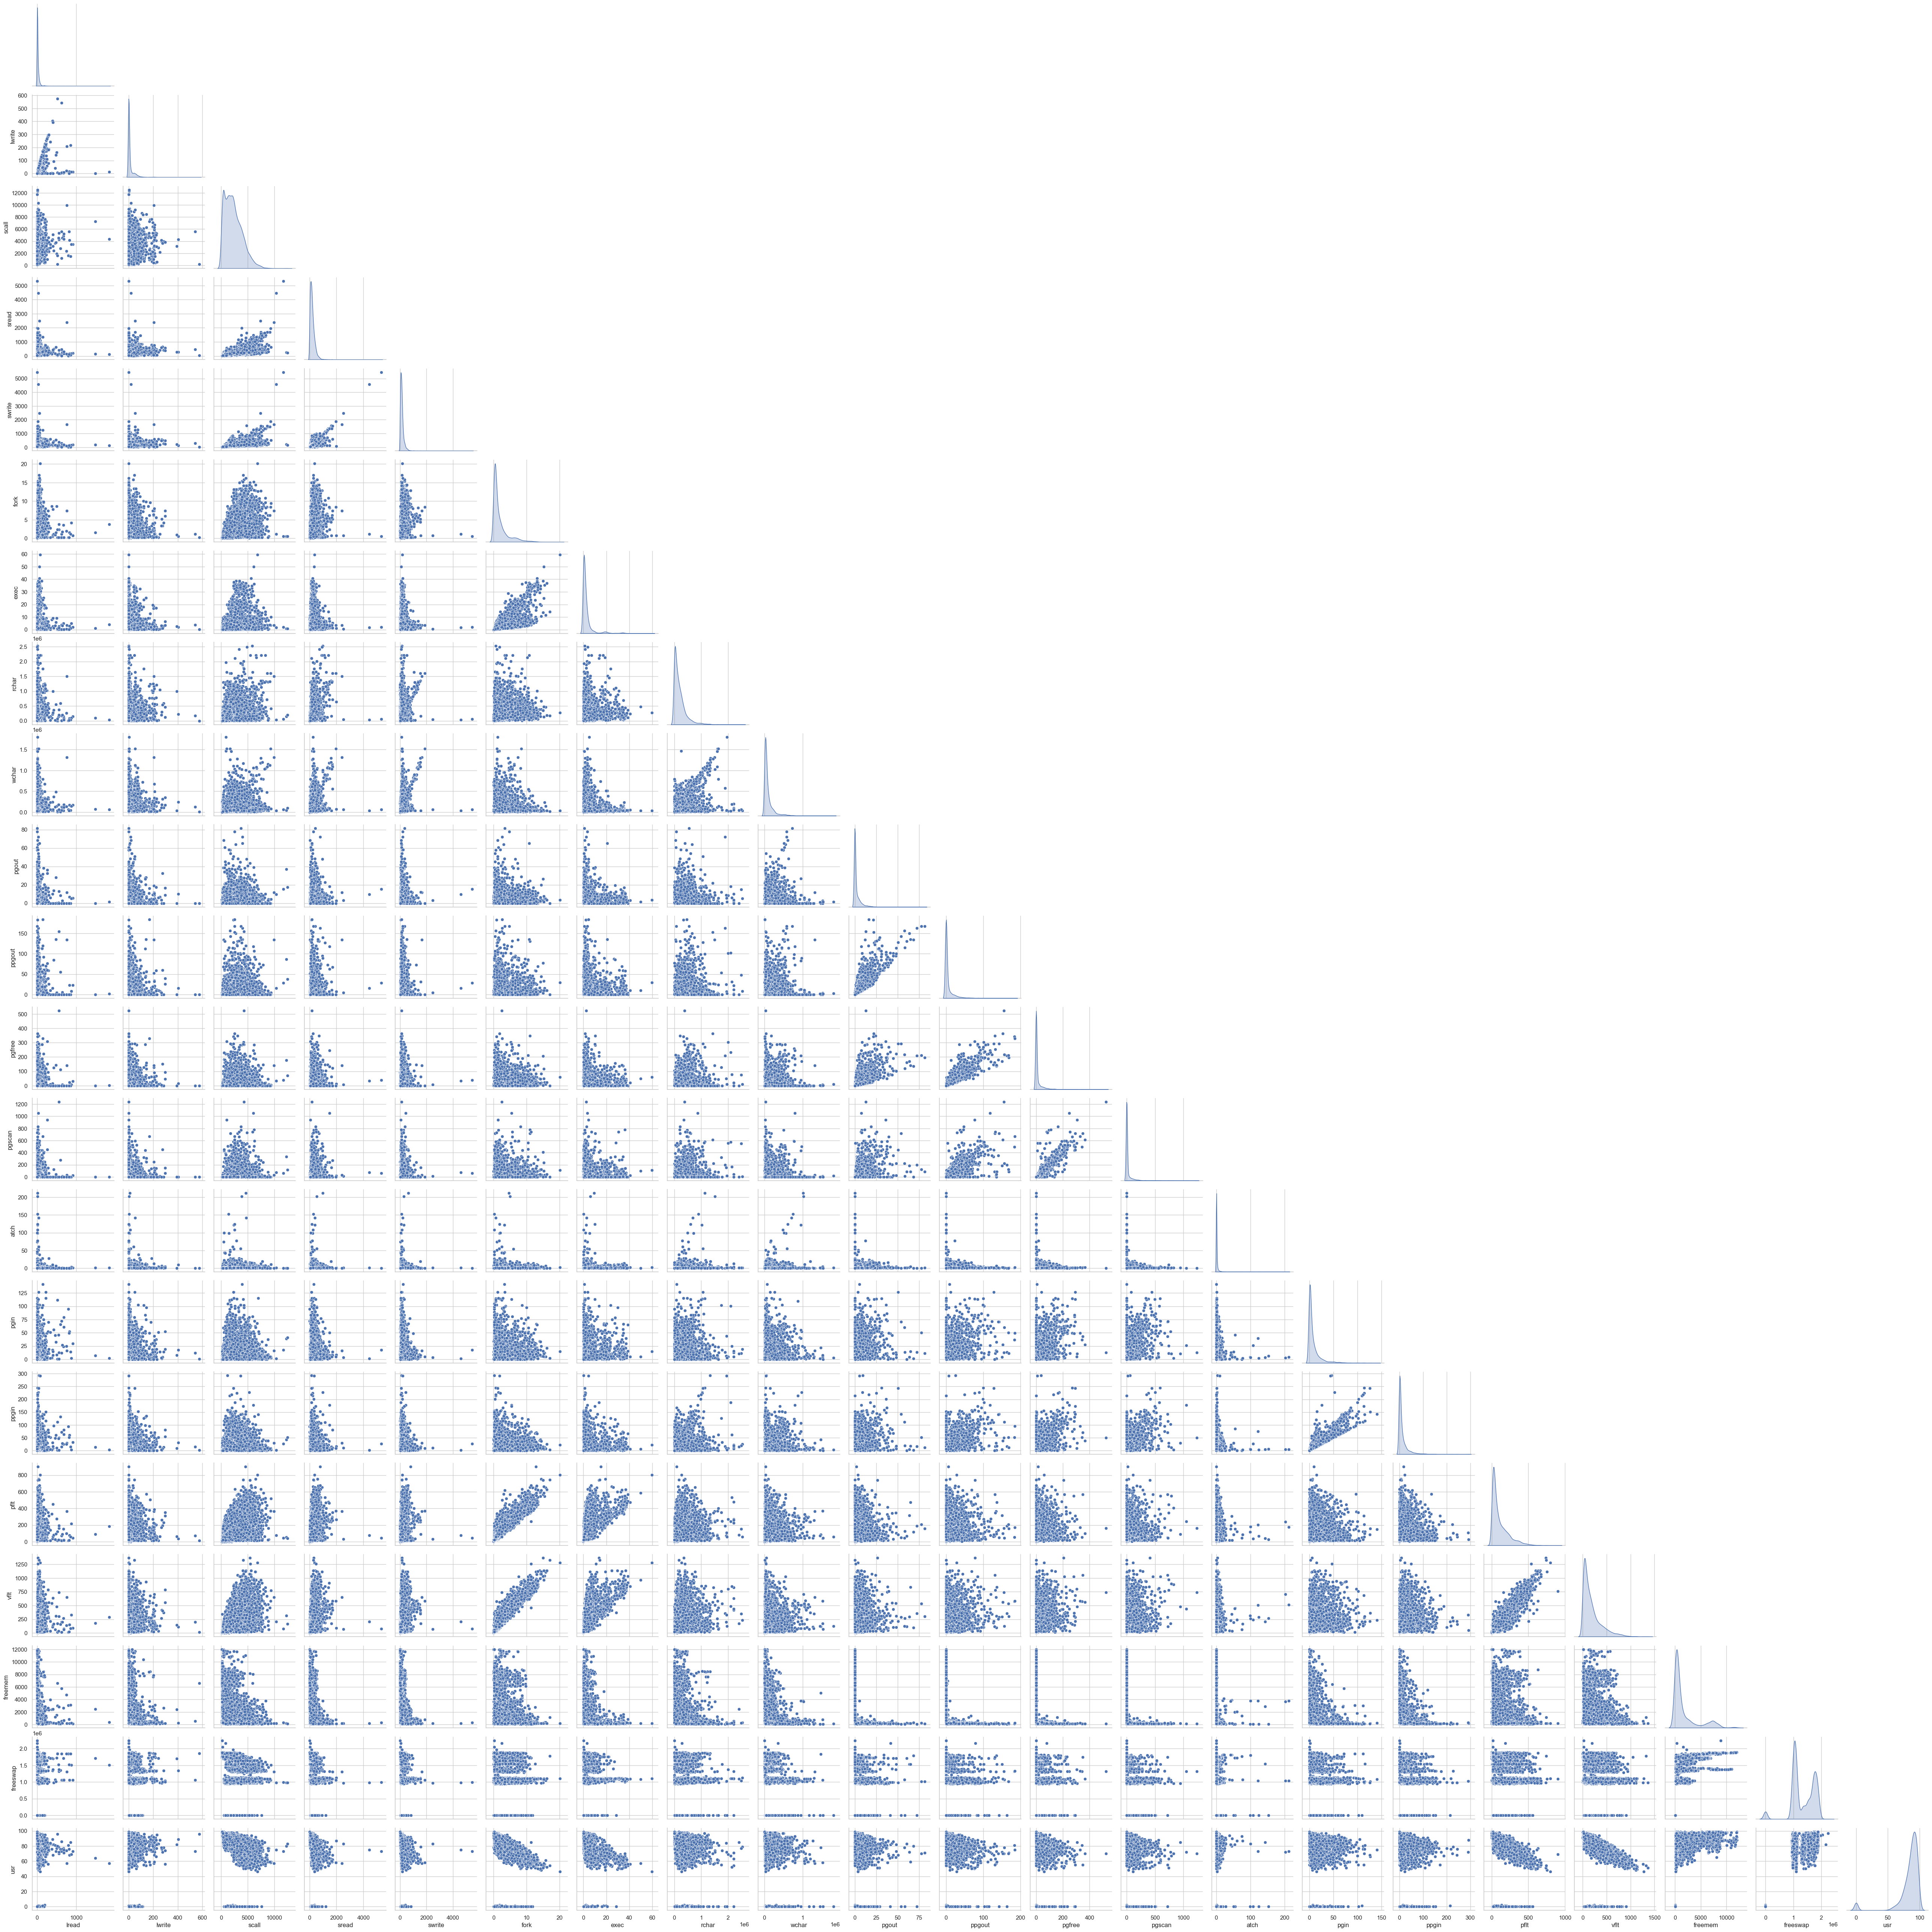

In [14]:
sns.pairplot(numerical_columns, diag_kind='kde', corner=True)
plt.show()

### Perform Univariate Analysis for Categorical Data

In [15]:
frequency_distribution = comp_activ['runqsz'].value_counts()

# Convert it to a DataFrame for better visualization
frequency_df = pd.DataFrame({'Category': frequency_distribution.index, 'Frequency': frequency_distribution.values})

# Display the frequency distribution
print(frequency_df)

        Category  Frequency
0  Not_CPU_Bound       4331
1      CPU_Bound       3861


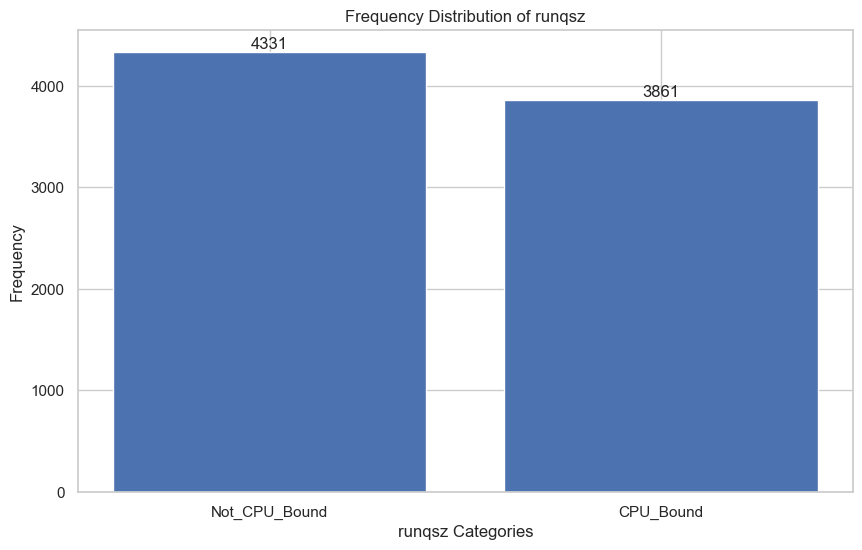

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(frequency_df['Category'], frequency_df['Frequency'])
plt.title('Frequency Distribution of runqsz')
plt.xlabel('runqsz Categories')
plt.ylabel('Frequency')

# Annotate each bar with its frequency value
for i, freq in enumerate(frequency_df['Frequency']):
    plt.text(i, freq, str(freq), ha='center', va='bottom')

plt.show()

**Insights:**
1. In the data set, there are 8192 rows and 22 columns that consist of categorical and numerical values (float64(13), int64(8), and object(1)).
2. Two columns rchar and wchar have null values.
3. There are no duplicate values.
4. Most of the numerical columns have outliers.
5. From the histogram, we can say all the features have a left-skewed distribution. The usr’ feature has a right skewed distribution.
5. 'usr’ is the target variable, and all other variables are predector variables.
6. Bivariate and multivariate analysis indicates that there is a strong positive correlation between the target variable usr and the predictor variables freemem and freeswap.
7. From the analysis, we can say we have a total process run queue size of 3861 as CPU_Bound and 4331 as Not CPU_Bound.

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

### Check Null-value

In [17]:
comp_activ.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

**In the data set, there are null values for ‘rchar’ and ‘wchar. As it is a continuous variable, the mean value can be imputed.**

In [18]:
# Calculate the mean for 'rchar' and 'wchar' columns
rchar_mean = comp_activ['rchar'].mean()
wchar_mean = comp_activ['wchar'].mean()

# Fill missing values with the mean value
comp_activ['rchar'].fillna(rchar_mean, inplace=True)
comp_activ['wchar'].fillna(wchar_mean, inplace=True)

In [19]:
comp_activ.head()

lread  lwrite  scall  sread  swrite  fork  exec          rchar    wchar  \
0      1       0   2147     79      68   0.2   0.2   40671.000000  53995.0   
1      0       0    170     18      21   0.2   0.2     448.000000   8385.0   
2     15       3   2162    159     119   2.0   2.4  197385.728363  31950.0   
3      0       0    160     12      16   0.2   0.2  197385.728363   8670.0   
4      5       1    330     39      38   0.4   0.4  197385.728363  12185.0   

   pgout  ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  \
0    0.0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound   
1    0.0  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound   
2    0.0  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound   
3    0.0  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound   
4    0.0  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound   

   freemem freeswap  usr  
0     4670  1730946   95  
1     7278  1869002   97  
2      702  1021237   87  
3     7248  1863704   98  
4      633  1760253   90  

[5 rows x 22 columns]

In [20]:
comp_activ.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

**Now no null values are left.**

### Check for the values which are equal to zero

In [21]:
# Create a boolean mask for values equal to zero in the DataFrame
zero_mask = (comp_activ == 0)

# Apply the mask to the entire DataFrame and count the number of True values in each column
zero_count = zero_mask.sum()

# Display the columns and the count of zeros for each column
print(zero_count)

lread        675
lwrite      2684
scall          0
sread          0
swrite         0
fork          21
exec          21
rchar          0
wchar          0
pgout       4878
ppgout      4878
pgfree      4869
pgscan      6448
atch        4575
pgin        1220
ppgin       1220
pflt           3
vflt           0
runqsz         0
freemem        0
freeswap       0
usr          283
dtype: int64


**We can keep the 0s in our dataset for further analysis, as we have some features in our dataset that can be 0s if the system stays idle.** 

**All numerical columns have outliers. So, we have treated them using the IQR approach.**

### Outliers Treatment

In [22]:
comp_activ.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [23]:
# Define the columns to plot
numerical_columns = ['lread','lwrite','scall','sread','swrite','fork','exec','rchar','wchar','pgout','ppgout','pgfree',
                    'pgscan','atch','pgin','ppgin','pflt','vflt','freemem','freeswap','usr']       


### Box Plot Before Outliers Treatment

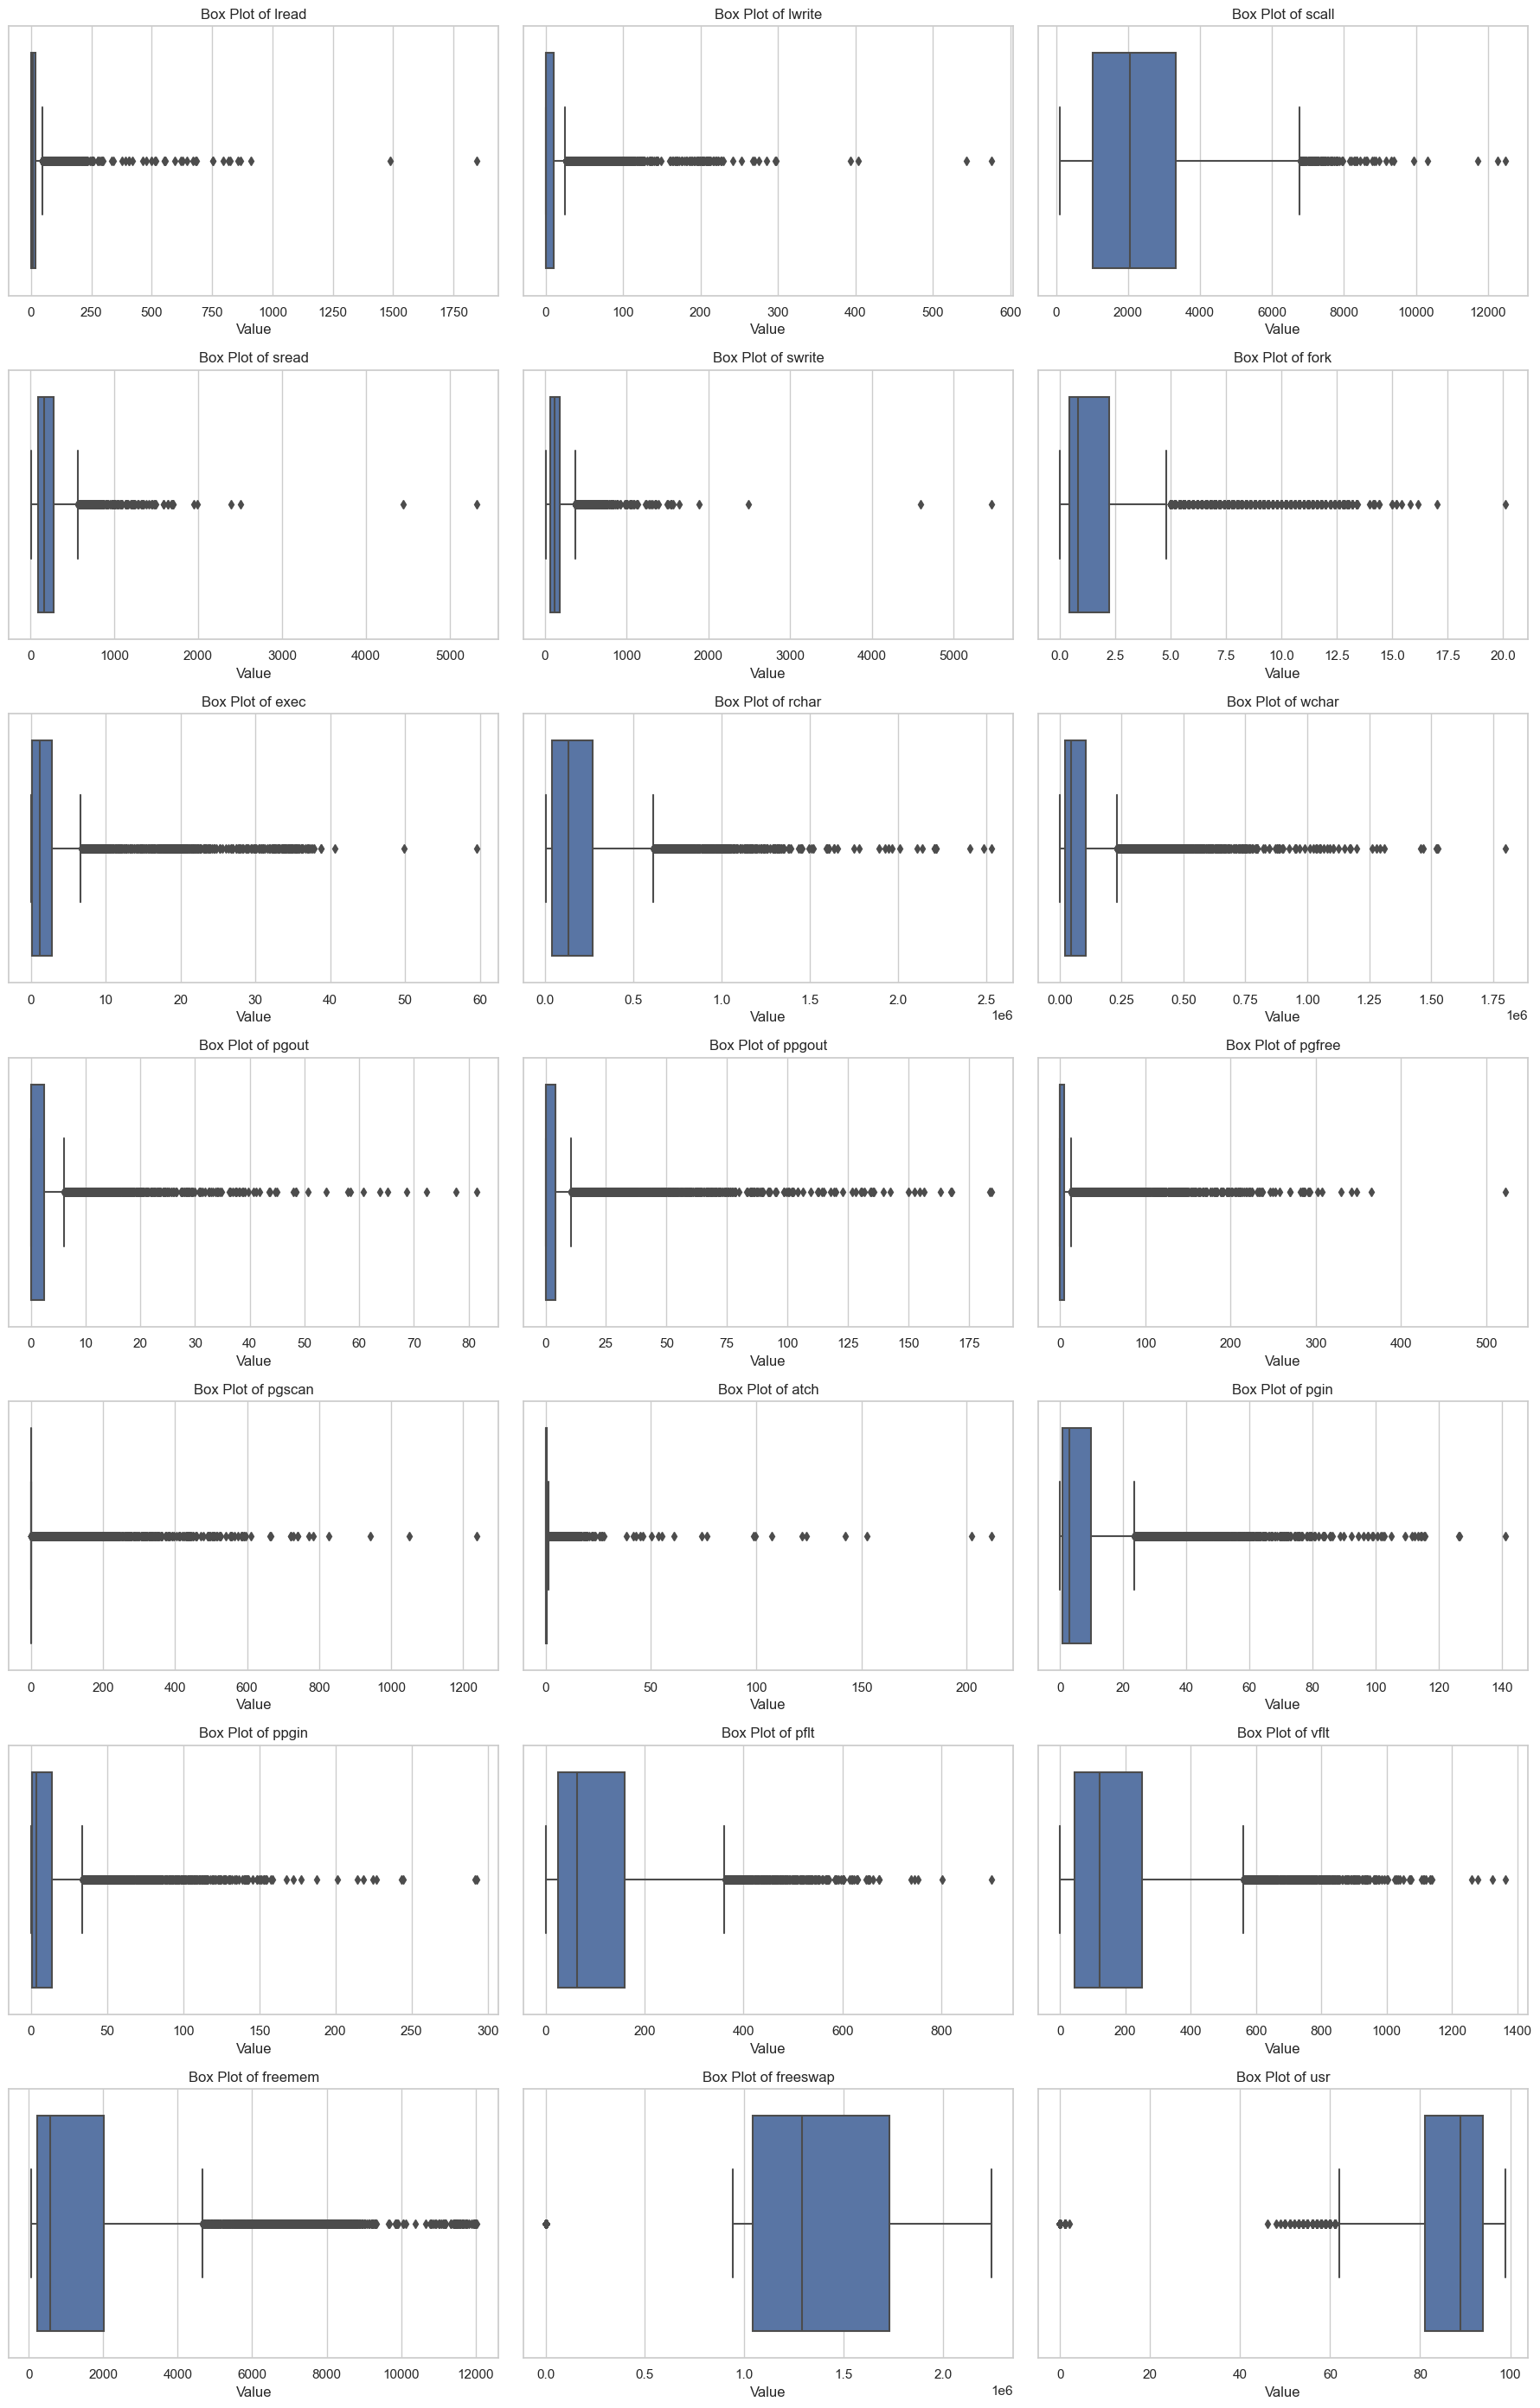

In [24]:
# Plot individual box plots for each numeric column
num_plots = len(numerical_columns)
num_rows = 7  # Number of rows for subplots
num_cols = (num_plots + num_rows - 1) // num_rows  # Number of columns for subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 4))

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=comp_activ[column], ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_xlabel('Value')
    axes[i // num_cols, i % num_cols].set_title(f'Box Plot of {column}')

# Hide any empty subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

### Box Plot After Outliers Treatment

In [25]:
def remove_outliers(col):
    min_val,max_val = col.quantile([0.25,0.75])
    return min_val,max_val

In [26]:
for column in numerical_columns:
    LL, UL = remove_outliers(comp_activ[column])
    comp_activ[column] = np.where(comp_activ[column] > UL, UL, comp_activ[column])
    comp_activ[column] = np.where(comp_activ[column] < LL, LL, comp_activ[column])

In [27]:
len(numerical_columns)

21

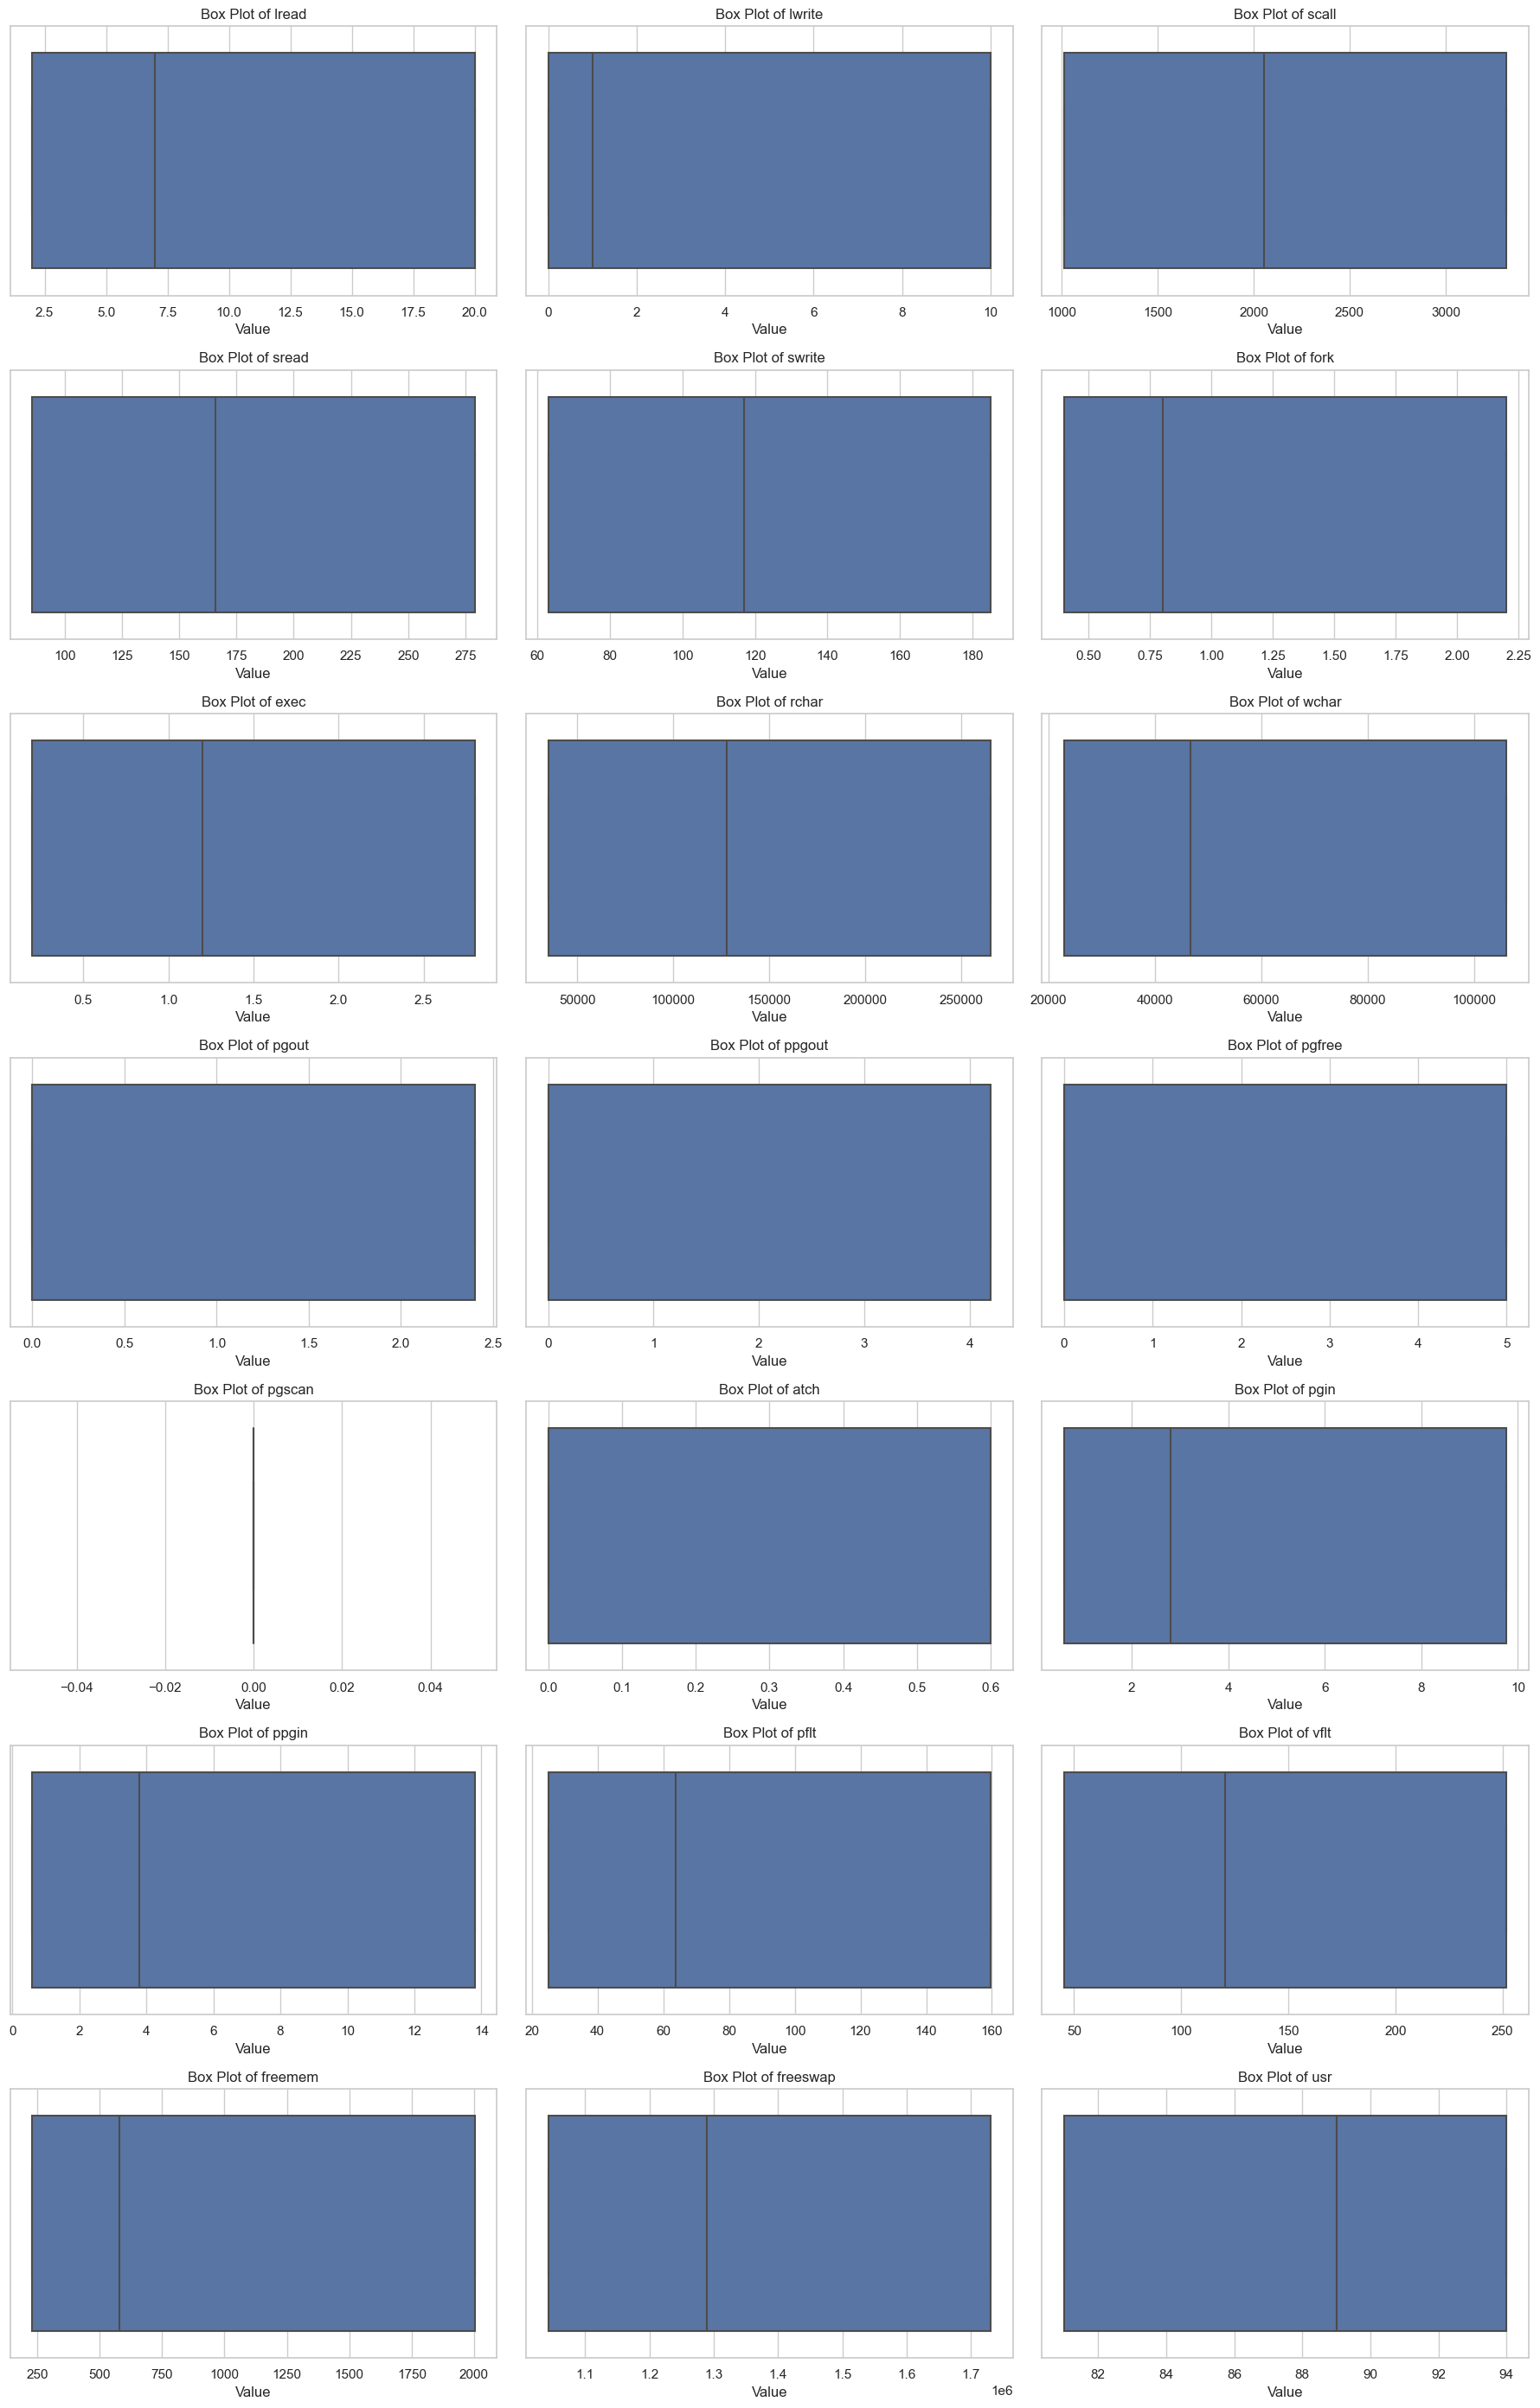

In [28]:
# Plot individual box plots for each numeric column
num_plots = len(numerical_columns)
num_rows = 7  # Number of rows for subplots
num_cols = (num_plots + num_rows - 1) // num_rows  # Number of columns for subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 4))

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=comp_activ[column], ax=axes[i // num_cols, i % num_cols])
    axes[i // num_cols, i % num_cols].set_xlabel('Value')
    axes[i // num_cols, i % num_cols].set_title(f'Box Plot of {column}')

# Hide any empty subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [29]:
comp_activ.head()

lread  lwrite   scall  sread  swrite  fork  exec          rchar     wchar  \
0    2.0     0.0  2147.0   86.0    68.0   0.4   0.2   40671.000000  53995.00   
1    2.0     0.0  1012.0   86.0    63.0   0.4   0.2   34860.500000  22977.75   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  197385.728363  31950.00   
3    2.0     0.0  1012.0   86.0    63.0   0.4   0.2  197385.728363  22977.75   
4    5.0     1.0  1012.0   86.0    63.0   0.4   0.4  197385.728363  22977.75   

   pgout  ...  pgscan  atch  pgin  ppgin   pflt   vflt         runqsz  \
0    0.0  ...     0.0   0.0   1.6    2.6   25.0   45.4      CPU_Bound   
1    0.0  ...     0.0   0.0   0.6    0.6   25.0   45.4  Not_CPU_Bound   
2    0.0  ...     0.0   0.6   6.0    9.4  150.2  220.2  Not_CPU_Bound   
3    0.0  ...     0.0   0.0   0.6    0.6   25.0   45.4  Not_CPU_Bound   
4    0.0  ...     0.0   0.0   1.0    1.2   37.8   47.6  Not_CPU_Bound   

   freemem   freeswap   usr  
0  2002.25  1730379.5  94.0  
1  2002.25  1730379.5  94.0  
2   702.00  1042623.5  87.0  
3  2002.25  1730379.5  94.0  
4   633.00  1730379.5  90.0  

[5 rows x 22 columns]

### Unique values for categorical variables:

In [30]:
# Get the list of column names with 'object' data type (categorical variables)
categorical_columns = comp_activ.select_dtypes(include=['object']).columns

# Loop through the categorical columns and print unique values
for column in categorical_columns:
    unique_values = comp_activ[column].unique()
    print(f"Unique values in '{column}':")
    
frequency_distribution = comp_activ['runqsz'].value_counts()
print(frequency_distribution)

Unique values in 'runqsz':
Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64


### Converting categorical to dummy variables:

In [31]:
# drop_first=True will drop one of the three origin columns
comp_activ = pd.get_dummies(comp_activ, columns=["runqsz"], drop_first=True)
comp_activ.head()

lread  lwrite   scall  sread  swrite  fork  exec          rchar     wchar  \
0    2.0     0.0  2147.0   86.0    68.0   0.4   0.2   40671.000000  53995.00   
1    2.0     0.0  1012.0   86.0    63.0   0.4   0.2   34860.500000  22977.75   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  197385.728363  31950.00   
3    2.0     0.0  1012.0   86.0    63.0   0.4   0.2  197385.728363  22977.75   
4    5.0     1.0  1012.0   86.0    63.0   0.4   0.4  197385.728363  22977.75   

   pgout  ...  pgscan  atch  pgin  ppgin   pflt   vflt  freemem   freeswap  \
0    0.0  ...     0.0   0.0   1.6    2.6   25.0   45.4  2002.25  1730379.5   
1    0.0  ...     0.0   0.0   0.6    0.6   25.0   45.4  2002.25  1730379.5   
2    0.0  ...     0.0   0.6   6.0    9.4  150.2  220.2   702.00  1042623.5   
3    0.0  ...     0.0   0.0   0.6    0.6   25.0   45.4  2002.25  1730379.5   
4    0.0  ...     0.0   0.0   1.0    1.2   37.8   47.6   633.00  1730379.5   

    usr  runqsz_Not_CPU_Bound  
0  94.0                     0  
1  94.0                     1  
2  87.0                     1  
3  94.0                     1  
4  90.0                     1  

[5 rows x 22 columns]

**Insights:**
1. I found null values in the rchar and wchar fields.
2. We used the median value from the data set to impute the null values.
3. The majority of the continuous fields had outliers, which we handled using the IQR method.
4. In this situation, scaling the data is not essential because either way we would arrive at an equivalent result. The normal equation, for instance, has a closed-form solution that may be used to determine the ideal parameter values for a linear regression model. There is no stepwise optimization procedure in our solution that uses that equation; therefore, feature scaling is not required.
5. It's not necessary to remove entries with 0 values since they.

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

**The object data has already been converted to a category variable.**

### Split Data

In [32]:
# independent variables
X = comp_activ.drop(["usr"], axis=1)
# dependent variable
y = comp_activ[["usr"]]

### Split the data into train and test (70:30)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
print(X_train.head())

      lread  lwrite    scall  sread  swrite  fork  exec      rchar      wchar  \
1310   20.0    10.0  3317.25  279.0   185.0   0.8   0.8  155004.00  106037.00   
7365   15.0     3.0  1203.00   86.0    63.0   1.6   1.8  163076.00   33674.00   
2284   20.0    10.0  3317.25  279.0   185.0   2.2   2.8  265394.75  106037.00   
7076    2.0     0.0  2585.00  203.0   145.0   0.6   0.6  265394.75  106037.00   
3114    2.0     1.0  1827.00   86.0    88.0   0.4   0.2   34860.50   22977.75   

      pgout  ...  pgfree  pgscan  atch   pgin  ppgin   pflt    vflt  freemem  \
1310    0.0  ...     0.0     0.0   0.6  0.600    0.6   48.8  134.00   249.00   
7365    0.0  ...     0.0     0.0   0.0  0.600    0.6  127.8  199.40  2002.25   
2284    2.4  ...     5.0     0.0   0.6  9.765   13.8  159.6  251.80   236.00   
7076    1.0  ...     1.0     0.0   0.6  9.765   13.8   49.9  194.39   451.00   
3114    0.0  ...     0.0     0.0   0.0  0.600    0.6   25.0   45.40   689.00   

       freeswap  runqsz_Not_CPU_

In [35]:
print(X_test.head())

      lread  lwrite   scall  sread  swrite  fork  exec      rchar     wchar  \
5670   14.0     7.0  1495.0  197.0   169.0   0.8   1.0   34860.50   24435.0   
5369   10.0     8.0  3158.0  279.0   172.0   0.6   2.2  265394.75  106037.0   
2111    2.0     0.0  1012.0  117.0   113.0   1.8   0.6   59903.00   24550.0   
6659   20.0    10.0  3283.0  134.0   125.0   0.4   0.4   34860.50   23626.0   
5227   12.0     2.0  2357.0  113.0    96.0   2.2   2.8   55137.00   36291.0   

      pgout  ...  pgfree  pgscan  atch   pgin  ppgin    pflt    vflt  freemem  \
5670    2.4  ...     5.0     0.0   0.6  2.000   2.00   63.07  106.79    231.0   
5369    0.0  ...     0.0     0.0   0.0  9.765  13.80   46.00   79.20    510.0   
2111    0.6  ...     5.0     0.0   0.0  0.600   0.60   96.00  135.60    231.0   
6659    2.4  ...     5.0     0.0   0.6  1.800   2.20   36.40   56.20    461.0   
5227    0.0  ...     0.0     0.0   0.0  8.380  12.18  159.60  251.80    530.0   

       freeswap  runqsz_Not_CPU_Bound 

### Fit Linear Model

In [36]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [37]:
# let's print the regression summary
print(olsres.summary())

                                 OLS Regression Results                                
Dep. Variable:                    usr   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                          1.588e+04
Date:                Sun, 03 Sep 2023   Prob (F-statistic):                        0.00
Time:                        21:49:47   Log-Likelihood:                         -22244.
No. Observations:                5734   AIC:                                  4.453e+04
Df Residuals:                    5714   BIC:                                  4.466e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

The regression results provide valuable insights into the relationship between the dependent variable 'usr' and the independent variables. Let's interpret the key findings:

### R-squared (uncentered) and Adj. R-squared (uncentered):
The value of adjusted R-squared, values accounts for the number of predictors in the model, and also around 0.982, which indicates that the predictive power of the model is robust.

### F-statistic:
The value of the F-statistic is 1.588e+04, and the associated p-value so close to zero (0.00). which indicates that in the dependent variable ‘usr’ there is at least one of the independent variables in the model is statistically significant in explaining the variance.

### Individual Coefficients:
The coefficients for each independent variable represent the effect of that variable on 'usr' while holding other variables constant.
For example, 'scall' has a positive coefficient of approximately 0.0028, suggesting that an increase in 'scall' is associated with an increase in 'usr.'
'fork' has a negative coefficient of approximately -5.3890, indicating that an increase in 'fork' is associated with a decrease in 'usr.'
Other coefficients have similar interpretations.

### P-values:
The p-values associated with each coefficient test the null hypothesis that the corresponding variable has no effect on 'usr.'
Variables with p-values close to zero are considered statistically significant predictors.
Multicollinearity:
The notes section mentions that the model does not contain a constant term and highlights the possibility of strong multicollinearity or other numerical problems due to the large condition number (2.81e-29).
It's essential to investigate multicollinearity further, as high multicollinearity can affect the stability and interpretability of the coefficients.

### How to check for Multicollinearity
- There are different ways of detecting (or testing) multicollinearity. One such way is Variation Inflation Factor.

- **Variance Inflation factor**: Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient 𝛽𝑘 is "inflated" by the existence of correlation among the predictor variables in the model.

- **General Rule of Thumb**:
    * If VIF is 1, then there is no correlation among the 𝑘 th predictor and the remaining predictor variables, and hence, the variance of 𝛽𝑘 is not inflated at all.
    * If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.
    * The purpose of the analysis should dictate which threshold to use.

### Checking Multicollinearity using Variance Inflation Factor (VIF)

In [38]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

lread                   12.510466
lwrite                   6.918800
scall                   18.398697
sread                   35.959872
swrite                  37.045346
fork                    36.989257
exec                     9.227474
rchar                    6.629488
wchar                    6.174430
pgout                   37.054833
ppgout                  81.422159
pgfree                  46.294661
pgscan                        NaN
atch                     3.456503
pgin                    48.162294
ppgin                   46.184467
pflt                    34.527944
vflt                    32.280749
freemem                  6.259508
freeswap                12.409349
runqsz_Not_CPU_Bound     2.120644
dtype: float64



**Insights:**
   * The 'pgscan' variable has a VIF value of NaN, indicating perfect multicollinearity. This means that 'pgscan' can be perfectly predicted by other variables in the model, making it impossible to estimate its unique contribution to the dependent variable.
   
   * Variables with VIF values significantly above 10 are considered to have high multicollinearity. In your case, 'sread,' 'swrite,' 'fork,' 'pgout,' 'ppgout,' 'pgfree,' 'pgin,' 'pflt,' 'vflt,' and 'freeswap' all have VIF values well above this threshold.
   
   * 'ppgout' stands out with an exceptionally high VIF value of 81.42, indicating extremely high multicollinearity with other variables.

   * Variables with VIF values close to 1 have low multicollinearity. In your case, 'atch' and 'runqsz_Not_CPU_Bound' have VIF values around or below 3, suggesting relatively low multicollinearity with other variables.

   * To treat multicollinearity, we will have to drop one or more of the correlated features (cyclinders, displacement, horsepower and weight).

   * We will drop the variable that has the least impact on the adjusted R-squared of the model.

### Fit a simple linear model

In [39]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for lread is -0.04118737280640683
The coefficient for lwrite is 0.005754585369277813
The coefficient for scall is -0.000884558947615138
The coefficient for sread is -0.004198342018953773
The coefficient for swrite is -0.010462027641040586
The coefficient for fork is -0.24025999623680555
The coefficient for exec is -0.15027290222463954
The coefficient for rchar is -4.469856223624041e-06
The coefficient for wchar is -5.103636147348358e-06
The coefficient for pgout is -0.1718826706061481
The coefficient for ppgout is -0.06674110161520845
The coefficient for pgfree is 0.009538097172911349
The coefficient for pgscan is -1.1102230246251565e-16
The coefficient for atch is 0.8029892541500525
The coefficient for pgin is -0.04169407370855619
The coefficient for ppgin is -0.07773998823058044
The coefficient for pflt is -0.01648471347750056
The coefficient for vflt is -0.01569978940678018
The coefficient for freemem is 0.0005138228242103541
The coefficient for freeswap is 5.9848292

In [40]:
# Model using all independent variables
model_all = LinearRegression()
model_all.fit(X_train, y_train)

# Evaluate the model
y_train_pred_all = model_all.predict(X_train)
y_test_pred_all = model_all.predict(X_test)

# Calculate R-squared for train and test sets
train_r2_all = r2_score(y_train, y_train_pred_all)
test_r2_all = r2_score(y_test, y_test_pred_all)

In [41]:
# Create a subset of variables (e.g., select specific columns)
subset_cols = ['lread', 'lwrite', 'scall']
X_subset = X_train[subset_cols]

# Model using the subset of variables
model_subset = LinearRegression()
model_subset.fit(X_subset, y_train)

# Evaluate the model
y_train_pred_subset = model_subset.predict(X_subset)
X_test_subset = X_test[subset_cols]
y_test_pred_subset = model_subset.predict(X_test_subset)

# Calculate R-squared for train and test sets
train_r2_subset = r2_score(y_train, y_train_pred_subset)
test_r2_subset = r2_score(y_test, y_test_pred_subset)

In [42]:
# Model using Ridge regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed
ridge_model.fit(X_train, y_train)

# Evaluate the Ridge model
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Calculate R-squared for train and test sets
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

In [43]:
# Model using Lasso regression
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha parameter as needed
lasso_model.fit(X_train, y_train)

# Evaluate the Lasso model
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Calculate R-squared for train and test sets
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

In [44]:
# Compare R-squared values of different models
print("R-squared (All Variables):", test_r2_all)
print("R-squared (Subset of Variables):", test_r2_subset)
print("R-squared (Ridge Regression):", test_r2_ridge)
print("R-squared (Lasso Regression):", test_r2_lasso)

R-squared (All Variables): 0.7551759667986745
R-squared (Subset of Variables): 0.5357000952366756
R-squared (Ridge Regression): 0.7551726793034264
R-squared (Lasso Regression): 0.7546982819502279


In [45]:
#Create and Fit a Linear Regression Model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
# Make predictions on both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [47]:
# Calculate R-squared for train and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [48]:
# Calculate RMSE for train and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [49]:
# Calculate adjusted R-squared for the model (you can add this calculation if needed)
n = X_train.shape[0]  # Number of observations
p = X_train.shape[1]  # Number of predictors
adj_r2 = 1 - ((1 - test_r2) * (n - 1) / (n - p - 1))

In [50]:
# Print the evaluation metrics
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Adjusted R-squared:", adj_r2)

Train R-squared: 0.7682181016301031
Test R-squared: 0.7551759667986745
Train RMSE: 2.5016544758943864
Test RMSE: 2.5387794553843652
Adjusted R-squared: 0.7542758784413166


**Insights:**

The model explains about 75% of the variance in the test set, which is a reasonable level of performance for a linear regression model.

The RMSE values give an overview of the mean prediction error. The test RMSE is slightly higher than the train RMSE, which is to be expected since the model generally fits the training data better. However, both RMSE values are relatively low, indicating that the model's predictions are reasonably accurate.

The adjusted R-squared value takes into account the number of predictors in the model. In this case, the adjusted R-squared is close to the regular R-squared, indicating that the addition of predictors is not significantly impacting the model's performance.

### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

#### Data Overview:

- The dataset contains 8192 rows and 22 columns.
- Data types include float64, int64, and one object column.
- Two columns, 'rchar' and 'wchar,' have null values.
- No duplicate values are present.
- Most numerical columns exhibit outliers.
- The data distribution appears left-skewed for most features, with 'usr' being right-skewed.

#### Data Preprocessing:

- Null values in 'rchar' and 'wchar' are imputed using the median value from the dataset.
- Outliers in continuous fields are treated using the IQR (Interquartile Range) method.
- Scaling the data is considered unnecessary for this project because certain equations used for modeling (e.g., normal equations for linear regression) do not require feature scaling.

#### Multicollinearity Analysis:

- Perfect multicollinearity is observed for the 'pgscan' variable, indicating it can be predicted perfectly by other variables.
- Several variables have high VIF (Variance Inflation Factor) values, suggesting significant multicollinearity. Notably, 'ppgout' stands out with an exceptionally high VIF value.
- Variables with VIF values close to 1 indicate low multicollinearity.

#### Handling Multicollinearity:

- To address multicollinearity, one or more correlated features will be dropped from the model.
- The variable to be dropped will be chosen based on its impact on the adjusted R-squared of the model.

#### Model Evaluation:

- The model explains approximately 75% of the variance in the test set, which is considered reasonable for a linear regression model.
- Root Mean Square Error (RMSE) values indicate that the model's predictions are reasonably accurate.
- The adjusted R-squared, which considers the number of predictors, is close to the regular R-squared, suggesting that adding more predictors does not significantly impact model performance.

#### Business Interpretation and Actionable Insights:

- Data Quality and Preprocessing: Addressing missing values and outliers is crucial for accurate modeling. The choice of imputation methods and outlier handling should be documented and validated.

- Feature Selection: Careful consideration of feature selection is required to address multicollinearity. Removing highly correlated features can improve model interpretability and prevent overfitting.

- Model Performance: The model's performance is reasonable, but there is always room for improvement. Further fine-tuning and exploring alternative algorithms or features may yield better results.

- Interpretable Models: Consider using interpretable models (if not already) to provide more actionable insights and explanations for stakeholders.

- Continual Monitoring: Monitor model performance over time, as the dataset may change, and model drift can occur. Regular updates and retraining may be necessary.

## Problem 2:  Logistic Regression, LDA and CART
You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

### DATA DICTIONARY:
-----------------------
1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [51]:
Contraceptive = pd.read_excel('Contraceptive_method_dataset.xlsx')
Contraceptive.head(10)

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   
5      19.0        Tertiary          Tertiary                  0.0   
6      38.0         Primary         Secondary                  6.0   
7      21.0       Secondary         Secondary                  1.0   
8      27.0         Primary         Secondary                  3.0   
9      45.0      Uneducated        Uneducated                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   
5   Scientology           No                   3                     High   
6   Scientology           No                   3                      Low   
7   Scientology          Yes                   3                      Low   
8   Scientology           No                   3                Very High   
9   Scientology           No                   2                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No  
5         Exposed                        No  
6         Exposed                        No  
7         Exposed                        No  
8         Exposed                        No  
9     Not-Exposed                        No

In [52]:
Contraceptive.tail(10)

Wife_age Wife_ education Husband_education  No_of_children_born  \
1463      30.0      Uneducated         Secondary                  NaN   
1464      23.0         Primary           Primary                  NaN   
1465      25.0         Primary          Tertiary                  NaN   
1466      42.0         Primary          Tertiary                  NaN   
1467      29.0        Tertiary          Tertiary                  NaN   
1468      33.0        Tertiary          Tertiary                  NaN   
1469      33.0        Tertiary          Tertiary                  NaN   
1470      39.0       Secondary         Secondary                  NaN   
1471      33.0       Secondary         Secondary                  NaN   
1472      17.0       Secondary         Secondary                  1.0   

     Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
1463   Scientology           No                   3                Very High   
1464   Scientology           No                   2                Very High   
1465   Scientology           No                   1                     High   
1466   Scientology           No                   2                Very High   
1467   Scientology           No                   1                Very High   
1468   Scientology          Yes                   2                Very High   
1469   Scientology           No                   1                Very High   
1470   Scientology          Yes                   1                Very High   
1471   Scientology          Yes                   2                      Low   
1472   Scientology           No                   2                Very High   

     Media_exposure  Contraceptive_method_used  
1463         Exposed                       Yes  
1464         Exposed                       Yes  
1465         Exposed                       Yes  
1466         Exposed                       Yes  
1467         Exposed                       Yes  
1468         Exposed                       Yes  
1469         Exposed                       Yes  
1470         Exposed                       Yes  
1471         Exposed                       Yes  
1472         Exposed                       Yes

In [53]:
Contraceptive.shape

(1473, 10)

In [54]:
Contraceptive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [55]:
Contraceptive.describe()

Wife_age  No_of_children_born  Husband_Occupation
count  1402.000000          1452.000000         1473.000000
mean     32.606277             3.254132            2.137814
std       8.274927             2.365212            0.864857
min      16.000000             0.000000            1.000000
25%      26.000000             1.000000            1.000000
50%      32.000000             3.000000            2.000000
75%      39.000000             4.000000            3.000000
max      49.000000            16.000000            4.000000

### Check Null-value

In [56]:
Contraceptive.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

* columns Wife_age and No_of_children_born have null values. As it is a continuous variable,mean value can be imputed.

In [57]:
# Calculate the mean for 'rchar' and 'wchar' columns
Wife_age_mean = Contraceptive['Wife_age'].mean()
No_of_children_born_mean = Contraceptive['No_of_children_born'].mean()

# Fill missing values with the mean value
Contraceptive['Wife_age'].fillna(Wife_age_mean, inplace=True)
Contraceptive['No_of_children_born'].fillna(No_of_children_born_mean, inplace=True)

In [58]:
Contraceptive.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

### Check Duplicate value

In [59]:
Contraceptive.duplicated().sum()

80

* 80 rows have duplicate values.

In [60]:
duplicates = Contraceptive[Contraceptive.duplicated()]
duplicates

Wife_age Wife_ education Husband_education  No_of_children_born  \
79    38.000000        Tertiary          Tertiary                  1.0   
167   26.000000        Tertiary          Tertiary                  1.0   
224   47.000000        Tertiary          Tertiary                  4.0   
270   30.000000        Tertiary          Tertiary                  2.0   
299   26.000000        Tertiary          Tertiary                  1.0   
...         ...             ...               ...                  ...   
1367  44.000000        Tertiary          Tertiary                  5.0   
1387  32.606277       Secondary          Tertiary                  2.0   
1423  32.606277        Tertiary          Tertiary                  2.0   
1440  32.606277        Tertiary          Tertiary                  1.0   
1447  32.606277        Tertiary          Tertiary                  2.0   

        Wife_religion Wife_Working  Husband_Occupation  \
79        Scientology          Yes                   1   
167       Scientology           No                   1   
224       Scientology           No                   1   
270       Scientology           No                   1   
299       Scientology           No                   1   
...               ...          ...                 ...   
1367      Scientology          Yes                   1   
1387      Scientology          Yes                   2   
1423  Non-Scientology           No                   1   
1440  Non-Scientology          Yes                   2   
1447  Non-Scientology          Yes                   2   

     Standard_of_living_index Media_exposure  Contraceptive_method_used  
79                  Very High         Exposed                        No  
167                 Very High         Exposed                        No  
224                 Very High         Exposed                        No  
270                 Very High         Exposed                        No  
299                 Very High         Exposed                        No  
...                       ...             ...                       ...  
1367                Very High         Exposed                       Yes  
1387                Very High         Exposed                       Yes  
1423                Very High         Exposed                       Yes  
1440                Very High         Exposed                       Yes  
1447                Very High         Exposed                       Yes  

[80 rows x 10 columns]

In [61]:
# Remove duplicate rows and update the DataFrame
Contraceptive = Contraceptive.drop_duplicates()

In [62]:
Contraceptive.duplicated().sum()

0

### Outliers Treatment

In [63]:
Contraceptive.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

### Before Outliers Treatment

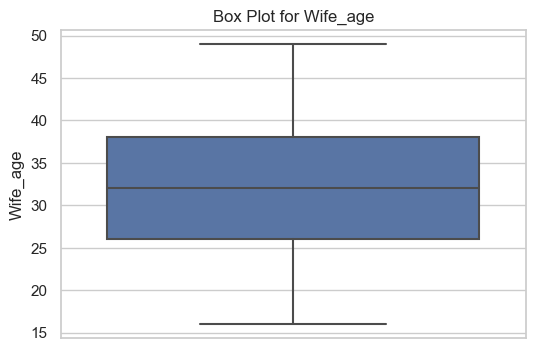

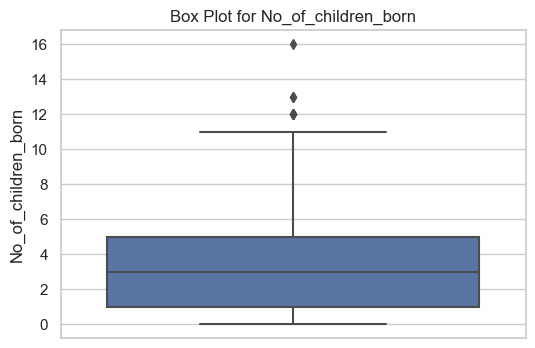

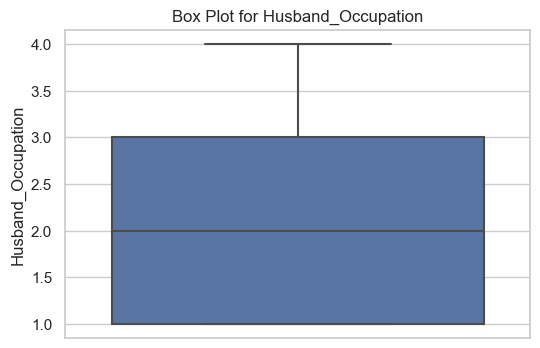

In [64]:
# Filter numeric columns
numeric_column = Contraceptive.select_dtypes(include=['int', 'float'])

# Create box plots for each numeric column
for column in numeric_column.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=Contraceptive, y=column, orient='v')
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.show()

### After Outliers Treatment

In [65]:
def remove_outliers(col):
    min_val,max_val = col.quantile([0.25,0.75])
    return min_val,max_val

In [66]:
for column in numeric_column.columns:
    LL, UL = remove_outliers(Contraceptive[column])
    Contraceptive[column] = np.where(Contraceptive[column] > UL, UL, Contraceptive[column])
    Contraceptive[column] = np.where(Contraceptive[column] < LL, LL, Contraceptive[column])

In [67]:
len(numeric_column.columns)

3

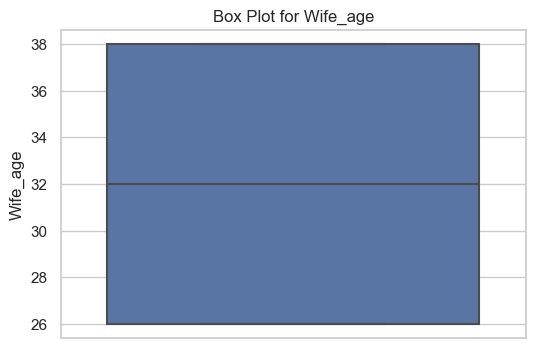

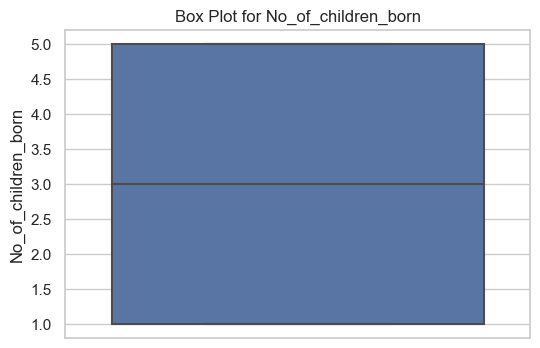

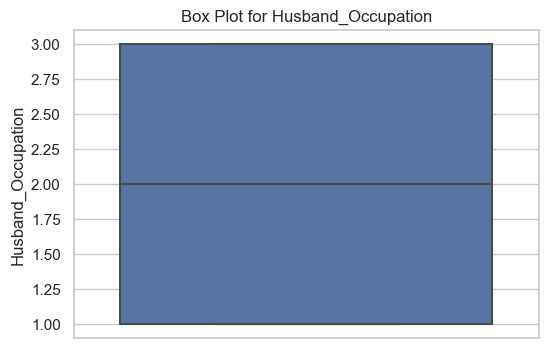

In [68]:
# Create box plots for each numeric column
for column in numeric_column.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=Contraceptive, y=column, orient='v')
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.show()

### Perform Univariate and Bivariate Analysis and Multivariate Analysis for Numerical Columns.

In [69]:
Contraceptive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   float64
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(3), object(7)
memory usage: 119.7+ KB


In [70]:
# Select numerical columns
numerical_columns = Contraceptive.select_dtypes(include=['int', 'float'])

# Display the names of the numerical columns
print(numerical_columns.columns)

Index(['Wife_age', 'No_of_children_born', 'Husband_Occupation'], dtype='object')


#### Univariate Analysis

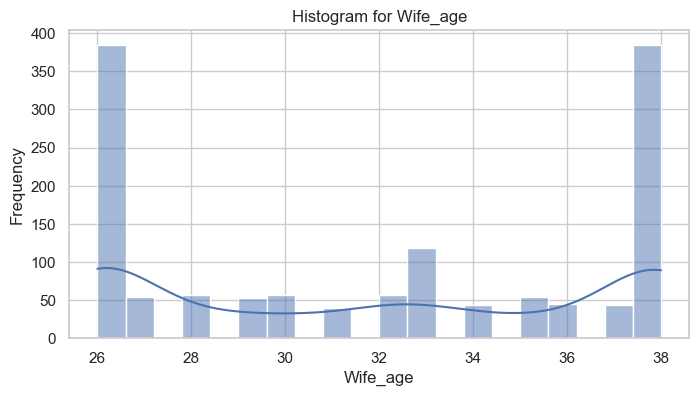

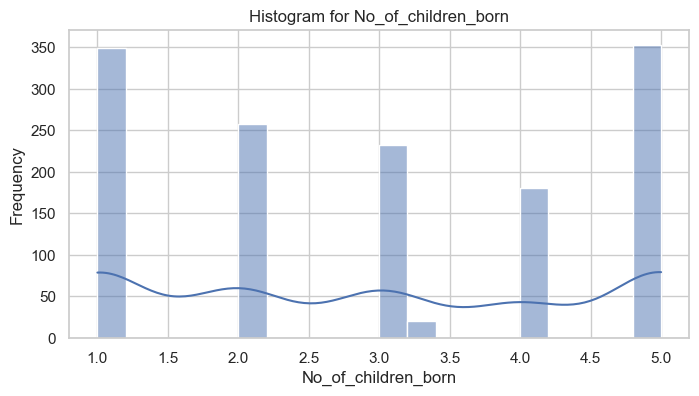

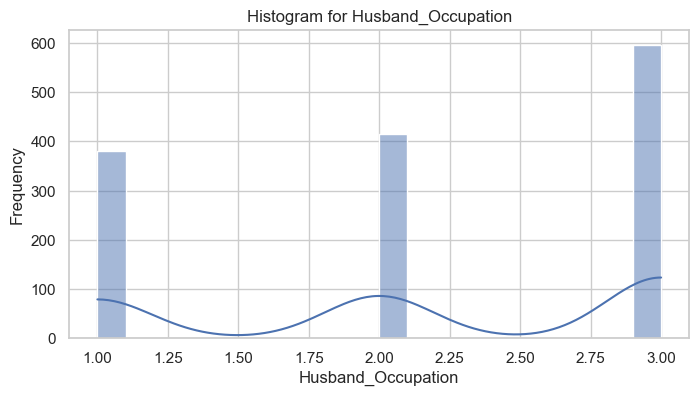

In [71]:
# Histograms for Numerical Columns
for column in numeric_column.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=Contraceptive, x=column, bins=20, kde=True)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Bivariate Analysis

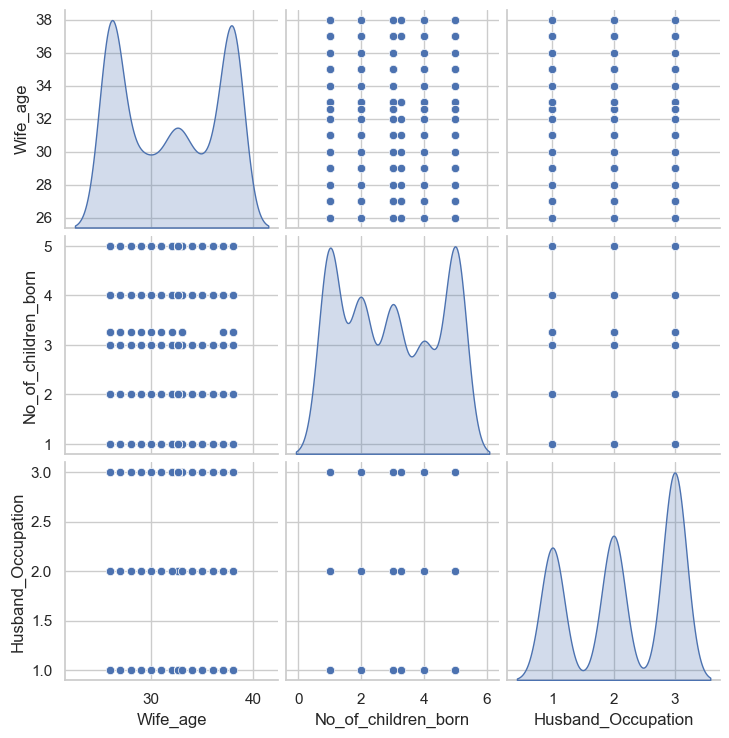

In [72]:
# Create a pair plot
sns.pairplot(data=Contraceptive, diag_kind='kde')
plt.show()

### Multivariate Analysis

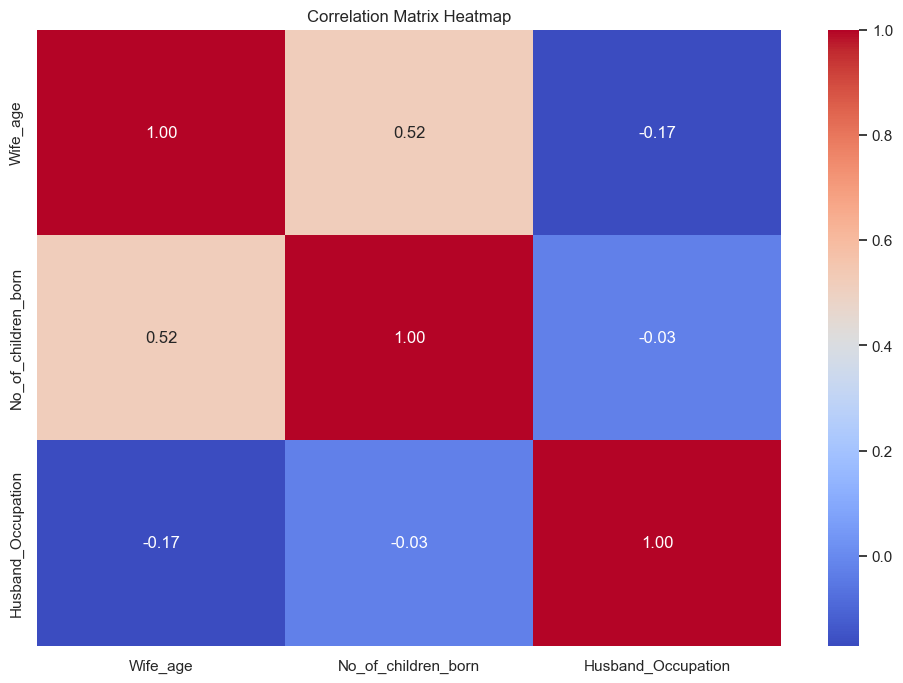

In [73]:
# Correlation matrix heatmap
correlation_matrix = Contraceptive.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

### Perform Univariate and Bivariate Analysis and Multivariate Analysis for Categorical Variables Columns.

In [74]:
# Select Categorical columns
Categorical_columns = Contraceptive.select_dtypes(include=['object'])

# Display the names of the Categorical columns
print(Categorical_columns.columns)

Index(['Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working',
       'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')


### Univariate Analysis

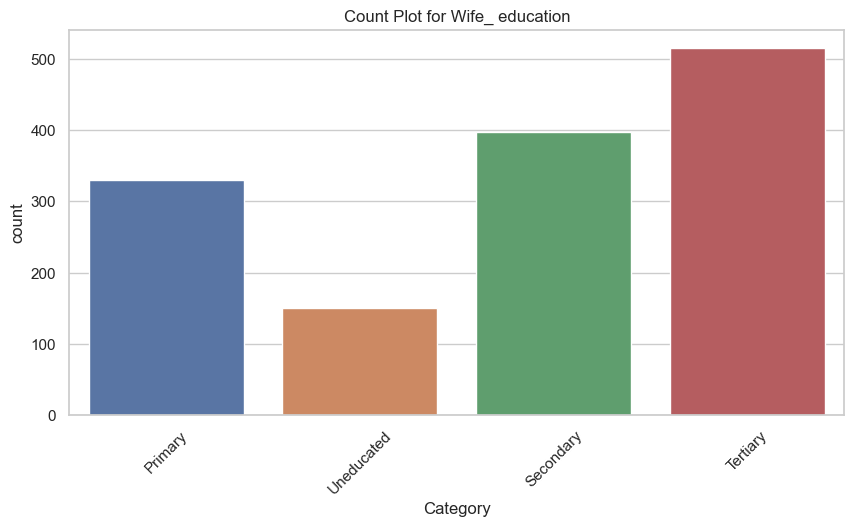

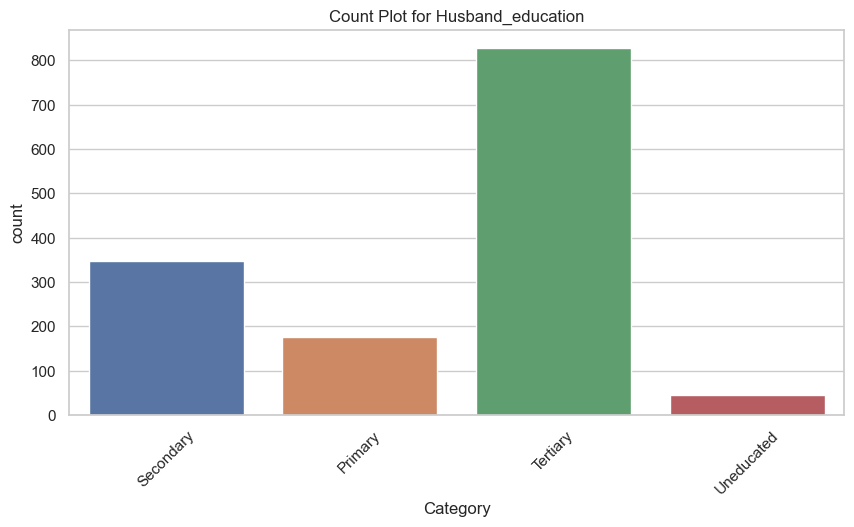

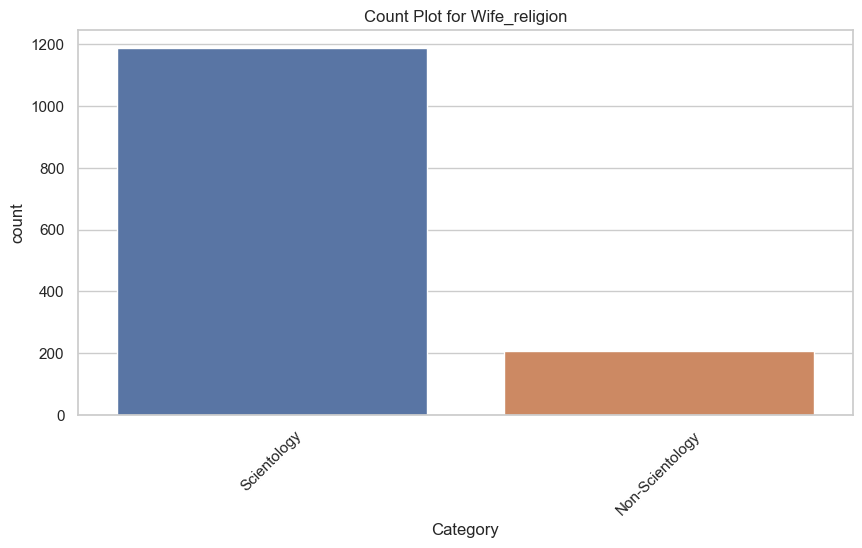

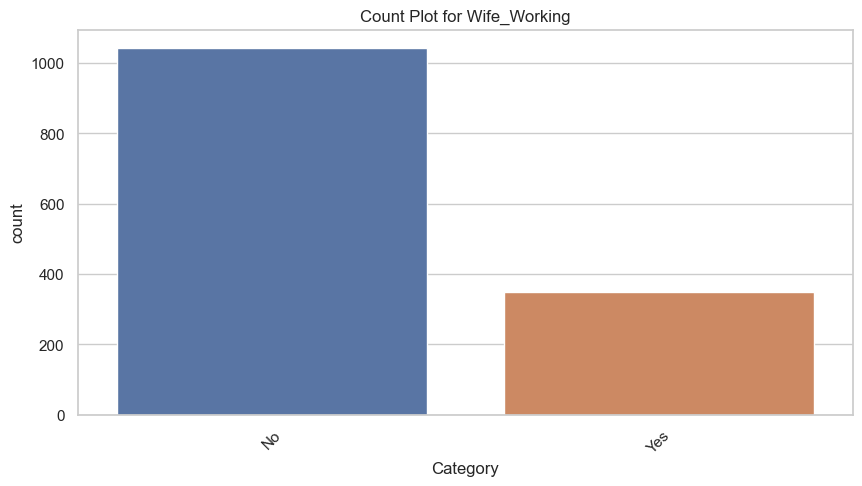

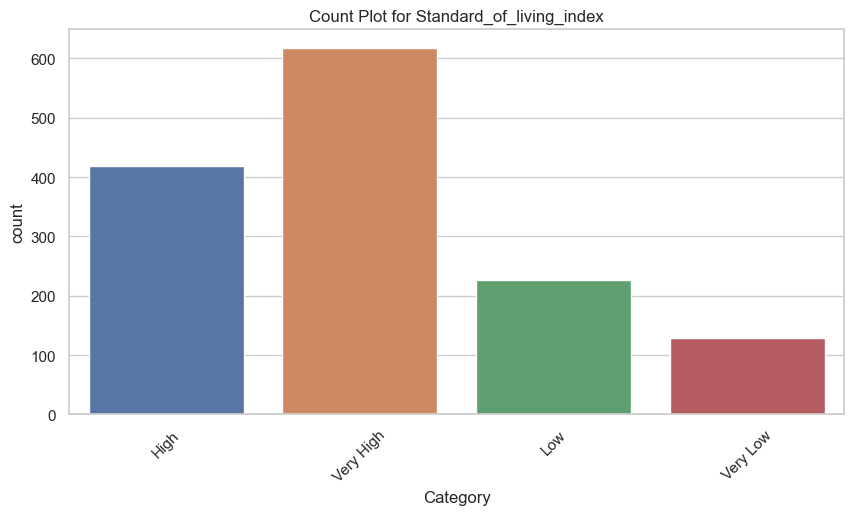

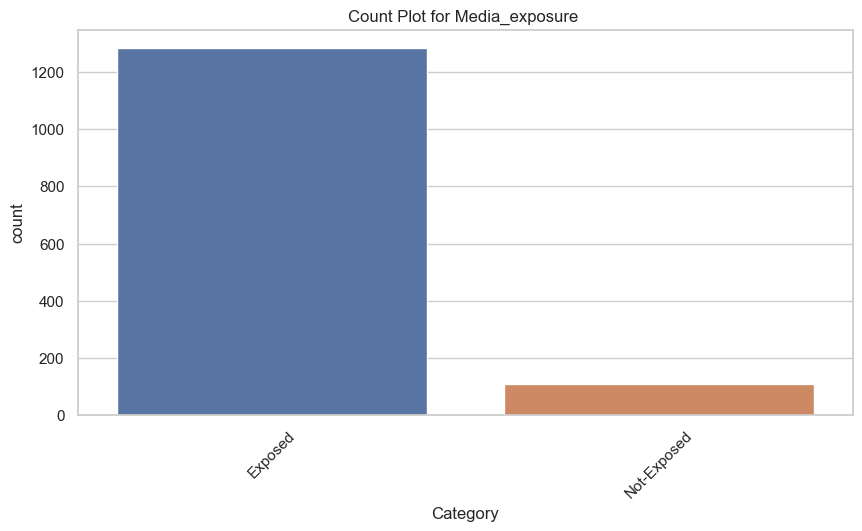

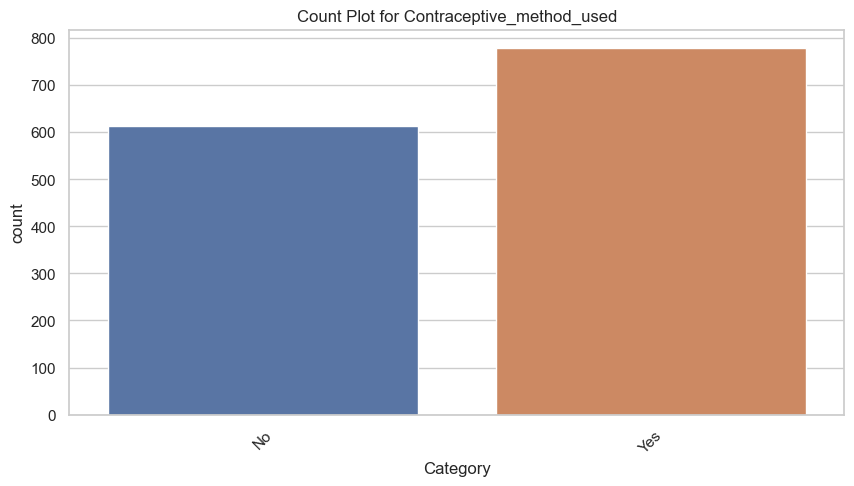

In [75]:
# Histograms for Categorical column

# Filter categorical columns
categorical_columns = Contraceptive.select_dtypes(include=['object'])

# Create count plots for each categorical column
for column in categorical_columns.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=Contraceptive, x=column)
    plt.title(f'Count Plot for {column}')
    plt.xlabel('Category')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

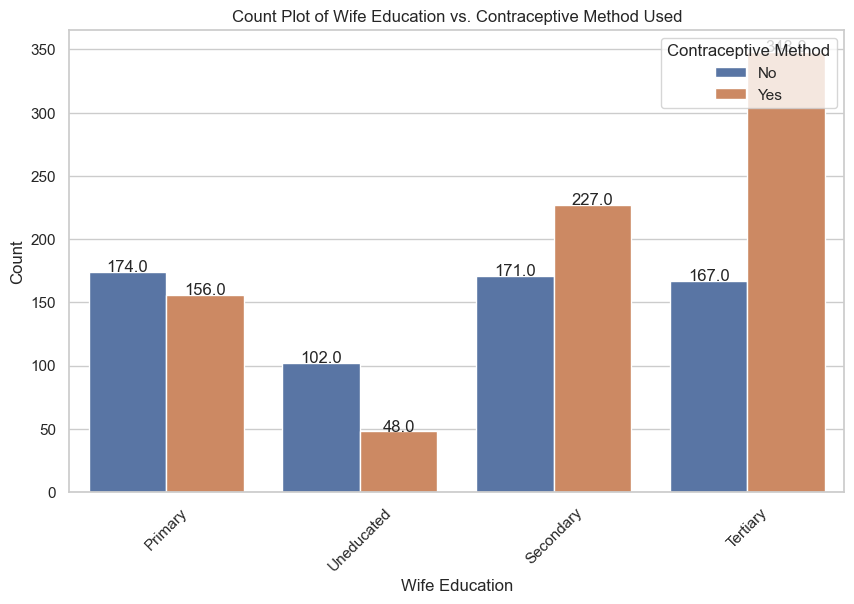

In [76]:
# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=Contraceptive, x='Wife_ education', hue='Contraceptive_method_used')

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.title('Count Plot of Wife Education vs. Contraceptive Method Used')
plt.xlabel('Wife Education')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Contraceptive Method', loc='upper right', labels=['No', 'Yes'])
plt.show()

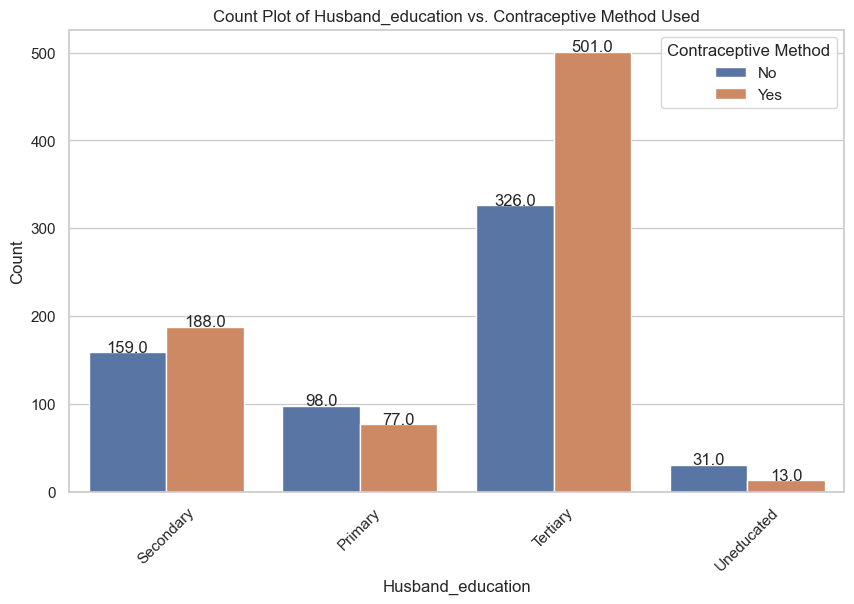

In [77]:
# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=Contraceptive, x='Husband_education', hue='Contraceptive_method_used')

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.title('Count Plot of Husband_education vs. Contraceptive Method Used')
plt.xlabel('Husband_education')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Contraceptive Method', loc='upper right', labels=['No', 'Yes'])
plt.show()

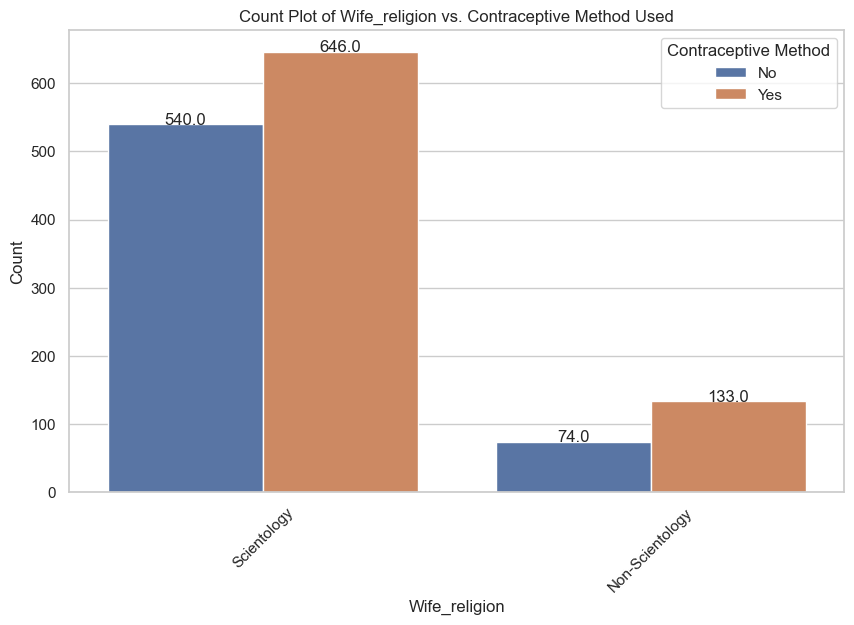

In [78]:
# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=Contraceptive, x='Wife_religion', hue='Contraceptive_method_used')

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.title('Count Plot of Wife_religion vs. Contraceptive Method Used')
plt.xlabel('Wife_religion')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Contraceptive Method', loc='upper right', labels=['No', 'Yes'])
plt.show()

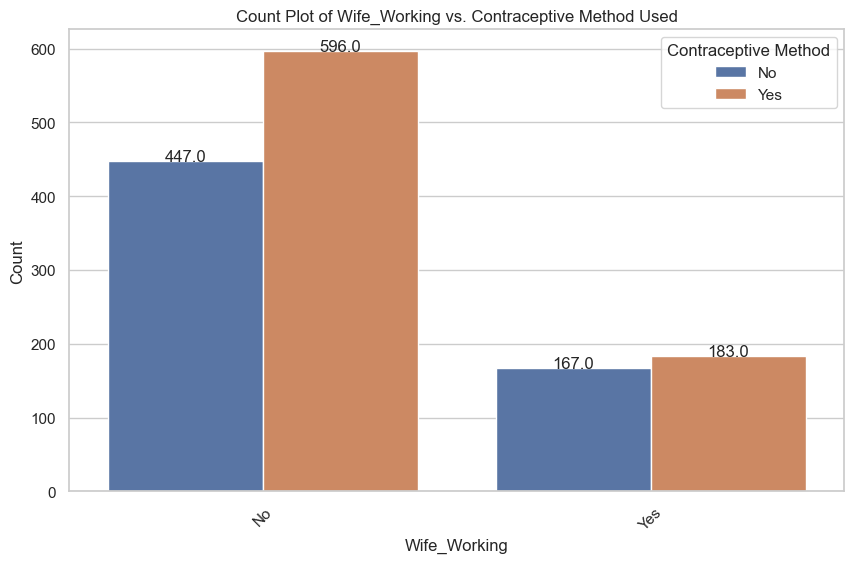

In [79]:
# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=Contraceptive, x='Wife_Working', hue='Contraceptive_method_used')

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.title('Count Plot of Wife_Working vs. Contraceptive Method Used')
plt.xlabel('Wife_Working')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Contraceptive Method', loc='upper right', labels=['No', 'Yes'])
plt.show()

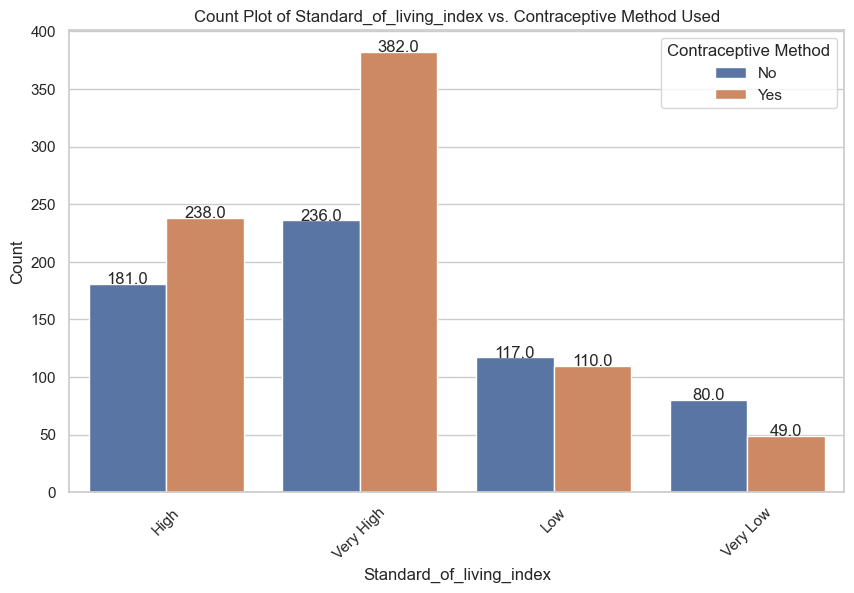

In [80]:
# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=Contraceptive, x='Standard_of_living_index', hue='Contraceptive_method_used')

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.title('Count Plot of Standard_of_living_index vs. Contraceptive Method Used')
plt.xlabel('Standard_of_living_index')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Contraceptive Method', loc='upper right', labels=['No', 'Yes'])
plt.show()

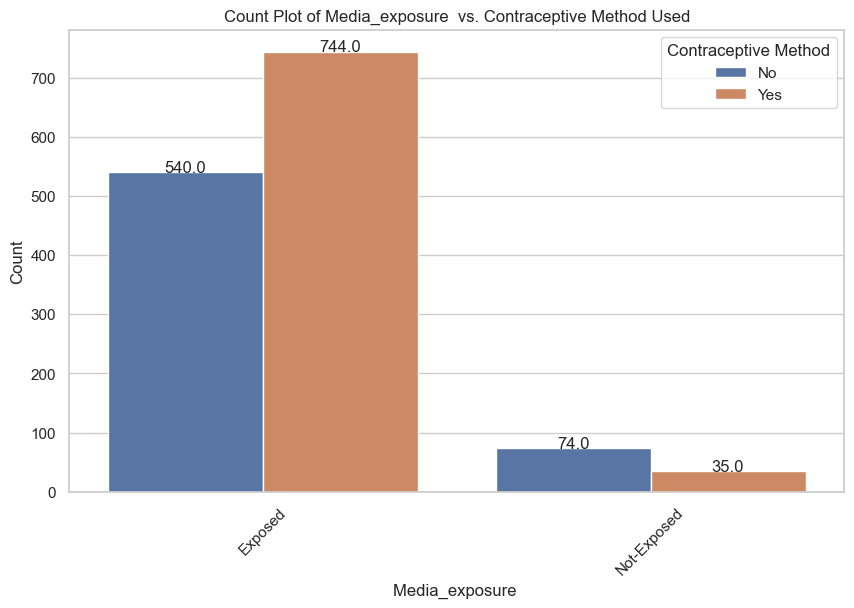

In [81]:
# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=Contraceptive, x='Media_exposure ', hue='Contraceptive_method_used')

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.title('Count Plot of Media_exposure  vs. Contraceptive Method Used')
plt.xlabel('Media_exposure ')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Contraceptive Method', loc='upper right', labels=['No', 'Yes'])
plt.show()

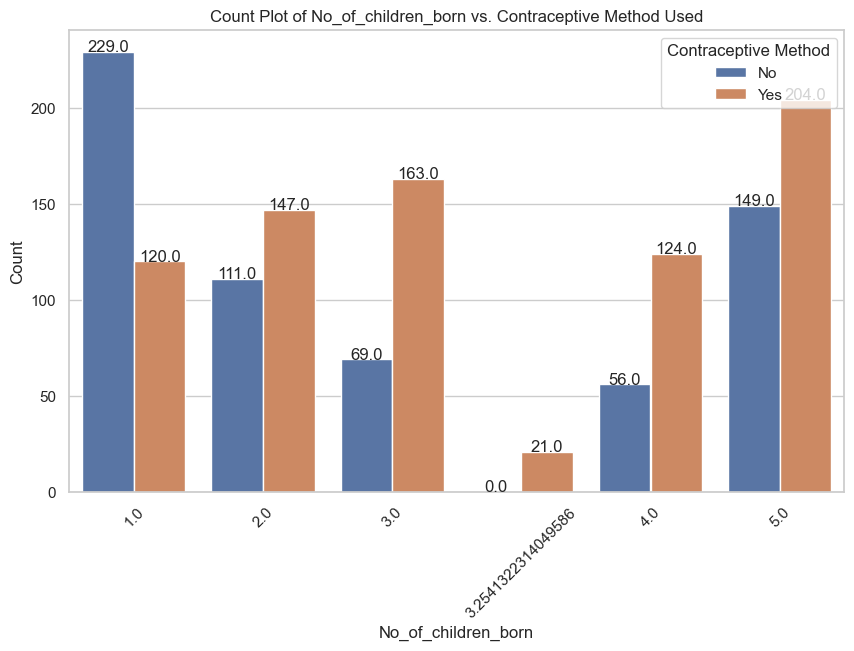

In [82]:
# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=Contraceptive, x='No_of_children_born', hue='Contraceptive_method_used')

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.title('Count Plot of No_of_children_born vs. Contraceptive Method Used')
plt.xlabel('No_of_children_born')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Contraceptive Method', loc='upper right', labels=['No', 'Yes'])
plt.show()

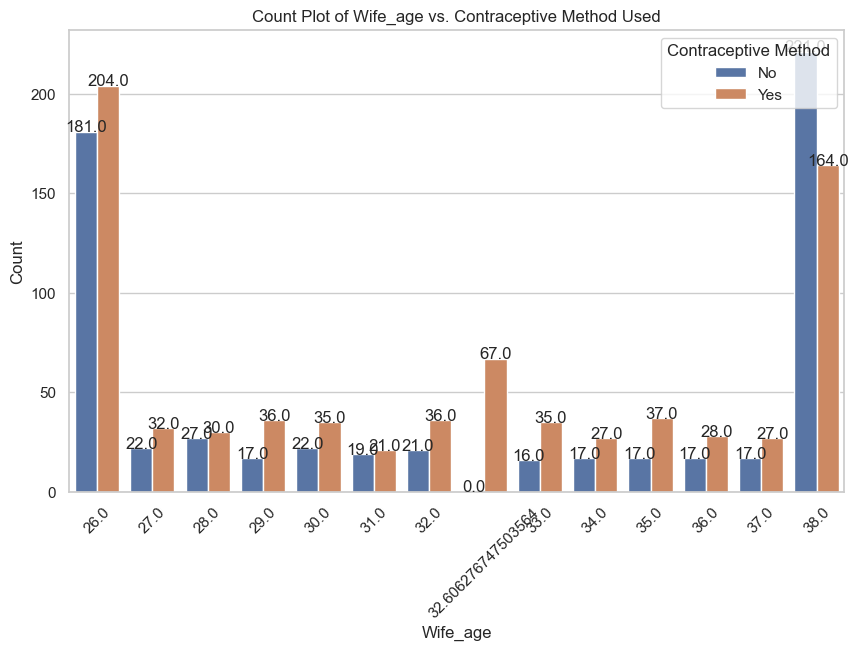

In [83]:
# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=Contraceptive, x='Wife_age', hue='Contraceptive_method_used')

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.title('Count Plot of Wife_age vs. Contraceptive Method Used')
plt.xlabel('Wife_age')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Contraceptive Method', loc='upper right', labels=['No', 'Yes'])
plt.show()

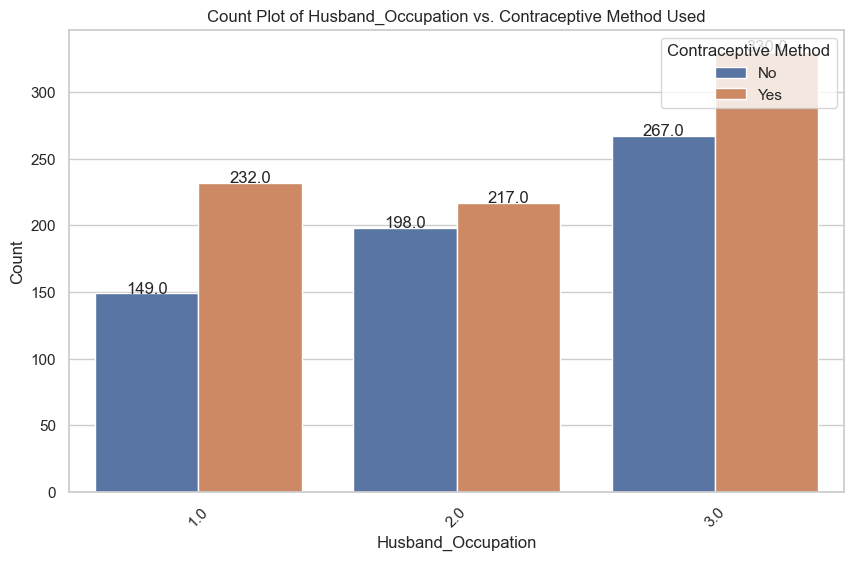

In [84]:
# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=Contraceptive, x='Husband_Occupation', hue='Contraceptive_method_used')

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
    
plt.title('Count Plot of Husband_Occupation vs. Contraceptive Method Used')
plt.xlabel('Husband_Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Contraceptive Method', loc='upper right', labels=['No', 'Yes'])
plt.show()

**Insights :**
1. Data consists of both categorical and numerical values.
2. There are total of 1473 rows and 10 columns in the dataset. Out of 22, 7 columns are of object type,1 columns of integer type and remaining 2 are of foat type data.
3. 'contraceptive used’ is the target variable and all other are predector variables.
4. Looking into the fields in the univariate analysis, we see outliers is present only in the field number_of_children.
5. Looking in to the boxplot between target variable contraceptive method used and the no_of_children_born, we see that , No_of_children_born is high in the case of use of contracepton used.
6. Bivariate and multivariate analysis indicates that there is strong positive correlation between the fields wife_age and no_of_children_born.
7. We also notice that there are 80 duplicates records in the given data set and has been removed.
8. Null values identified has been imputed with mean

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

### Encode Categorical Variables

In [85]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [86]:
Contraceptive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   float64
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(3), object(7)
memory usage: 119.7+ KB


### Encode Categorical Variables

In [87]:
label_encoder = LabelEncoder()
categorical_columns = ['Wife_ education', 'Husband_education', 'Wife_religion', 'Wife_Working',
       'Standard_of_living_index', 'Media_exposure '] 

for col in categorical_columns:
    Contraceptive[col] = label_encoder.fit_transform(Contraceptive[col])

In [88]:
Contraceptive.head()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
0      26.0                0                  1                  3.0   
1      38.0                3                  1                  5.0   
2      38.0                0                  1                  5.0   
3      38.0                1                  0                  5.0   
4      36.0                1                  1                  5.0   

   Wife_religion  Wife_Working  Husband_Occupation  Standard_of_living_index  \
0              1             0                 2.0                         0   
1              1             0                 3.0                         2   
2              1             0                 3.0                         2   
3              1             0                 3.0                         0   
4              1             0                 3.0                         1   

   Media_exposure  Contraceptive_method_used  
0                0                        No  
1                0                        No  
2                0                        No  
3                0                        No  
4                0                        No

In [89]:
Contraceptive['Contraceptive_method_used'] = label_encoder.fit_transform(Contraceptive['Contraceptive_method_used'])

In [90]:
Contraceptive.head()

Wife_age  Wife_ education  Husband_education  No_of_children_born  \
0      26.0                0                  1                  3.0   
1      38.0                3                  1                  5.0   
2      38.0                0                  1                  5.0   
3      38.0                1                  0                  5.0   
4      36.0                1                  1                  5.0   

   Wife_religion  Wife_Working  Husband_Occupation  Standard_of_living_index  \
0              1             0                 2.0                         0   
1              1             0                 3.0                         2   
2              1             0                 3.0                         2   
3              1             0                 3.0                         0   
4              1             0                 3.0                         1   

   Media_exposure   Contraceptive_method_used  
0                0                          0  
1                0                          0  
2                0                          0  
3                0                          0  
4                0                          0

### Split the Data into Train and Test Sets (70:30)

In [91]:
X = Contraceptive.drop('Contraceptive_method_used', axis=1)  # Replace 'target_column' with your target variable
y = Contraceptive['Contraceptive_method_used']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Apply Logistic Regression

In [92]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [93]:
# Make predictions
lr_predictions = lr_model.predict(X_test)

### Apply Linear Discriminant Analysis (LDA)

In [94]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [95]:
# Make predictions
lda_predictions = lda_model.predict(X_test)

### Apply Classification and Regression Trees (CART, Decision Tree)

In [96]:
cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [97]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(cart_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

The above code will save a .dot file in your working directory.
WebGraphviz is Graphviz in the Browser.
Copy paste the contents of the file into the link below to get the visualization
http://webgraphviz.com/

### Variable Importance

In [98]:
print (pd.DataFrame(cart_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
Wife_age                  0.232377
No_of_children_born       0.172811
Wife_ education           0.152817
Standard_of_living_index  0.120592
Husband_Occupation        0.101508
Husband_education         0.100962
Wife_Working              0.056621
Wife_religion             0.040034
Media_exposure            0.022279


In [99]:
# Make predictions
cart_predictions = cart_model.predict(X_test)

In [100]:
cart_predictions.shape

(418,)

### Regularising the Decision Tree

#### Adding Tuning Parameters

In [101]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,5,10,15,20],
              'min_samples_leaf':[1,5,10,15,20],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             verbose=True)

In [102]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, max_features='auto',
                       min_samples_leaf=15, random_state=1024)

In [103]:
reg_dt_model = DecisionTreeClassifier( ccp_alpha=0.001,criterion='entropy', max_depth=15,
                       max_features='auto',
                           random_state=1024)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=15,
                       max_features='auto', random_state=1024)

### Generating New Tree

In [104]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [105]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
Wife_age                  0.292553
No_of_children_born       0.190730
Standard_of_living_index  0.116710
Wife_ education           0.113946
Husband_Occupation        0.091006
Husband_education         0.081977
Wife_Working              0.046203
Media_exposure            0.042044
Wife_religion             0.024830


### Predicting on Training and Test dataset

In [106]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [107]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (975,)
ytest_predict (418,)


### Getting the Predicted Classes

In [108]:
ytest_predict

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,

### Getting the Predicted Probabilities

In [109]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.53333333, 0.46666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.6       , 0.4       ],
       [0.2       , 0.8       ],
       [0.09090909, 0.90909091],
       [0.        , 1.        ],
       [0.09090909, 0.90909091],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.8       , 0.2       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.

In [110]:
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.000000  1.000000
1  1.000000  0.000000
2  0.533333  0.466667
3  0.000000  1.000000
4  0.000000  1.000000

### Evaluate the Models

In [111]:
# Evaluate Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_report = classification_report(y_test, lr_predictions)
lr_confusion = confusion_matrix(y_test, lr_predictions)

print('Evaluate Logistic Regression')
print('lr_accuracy = ', lr_accuracy)
print('lr_report\n', lr_report)
print('lr_confusion \n', lr_confusion)

Evaluate Logistic Regression
lr_accuracy =  0.65311004784689
lr_report
               precision    recall  f1-score   support

           0       0.67      0.43      0.52       186
           1       0.65      0.83      0.73       232

    accuracy                           0.65       418
   macro avg       0.66      0.63      0.63       418
weighted avg       0.66      0.65      0.64       418

lr_confusion 
 [[ 80 106]
 [ 39 193]]


**Insights:**
* The model shows better performance in predicting class 1 (positive class) with a higher precision, recall, and F1-score compared to class 0 (negative class).
* The model is better at identifying actual class 1 instances (higher recall) but is less precise in its predictions for class 1.
* For class 0, the model has moderate precision but struggles with recall, meaning it incorrectly classifies a significant portion of actual class 0 instances.
* The overall model accuracy is 65.31%, which indicates that it is better than random guessing, but there is room for improvement, especially in balancing the precision and recall for both classes.
* Depending on the specific problem and its requirements, you may need to fine-tune the model or consider other machine learning algorithms to improve its performance, especially if classifying both classes accurately is crucial.

In [112]:
# Evaluate LDA
lda_accuracy = accuracy_score(y_test, lda_predictions)
lda_report = classification_report(y_test, lda_predictions)
lda_confusion = confusion_matrix(y_test, lda_predictions)

print('Linear Discriminant Analysis (LDA)')
print('lda_accuracy = ', lda_accuracy)
print('lda_report\n', lda_report)
print('lda_confusion \n', lda_confusion)

Linear Discriminant Analysis (LDA)
lda_accuracy =  0.6555023923444976
lda_report
               precision    recall  f1-score   support

           0       0.68      0.43      0.53       186
           1       0.65      0.84      0.73       232

    accuracy                           0.66       418
   macro avg       0.66      0.63      0.63       418
weighted avg       0.66      0.66      0.64       418

lda_confusion 
 [[ 80 106]
 [ 38 194]]


**Insights:**

* The LDA model shows performance similar to the logistic regression model, with better performance in predicting class 1 (positive class) and lower performance in predicting class 0 (negative class).

* Similar to logistic regression, the model is better at identifying actual class 1 instances (higher recall) but is less precise in its predictions for class 1.

* For class 0, the model has moderate precision but struggles with recall, meaning it incorrectly classifies a significant portion of actual class 0 instances.

* The overall model accuracy is 65.55%, which indicates that it is better than random guessing, but there is room for improvement, especially in balancing the precision and recall for both classes.

* Depending on the specific problem and its requirements, you may need to fine-tune the model or consider other machine learning algorithms to improve its performance, especially if classifying both classes accurately is crucial. Additionally, you can try techniques like feature engineering or adjusting the model's hyperparameters to improve its performance further.

In [113]:
# Evaluate CART
cart_accuracy = accuracy_score(y_test, cart_predictions)
cart_report = classification_report(y_test, cart_predictions)
cart_confusion = confusion_matrix(y_test, cart_predictions)

print('Evaluate CART')
print('cart_accuracy = ', cart_accuracy)
print('cart_report\n', cart_report)
print('cart_confusion \n', cart_confusion)

Evaluate CART
cart_accuracy =  0.6172248803827751
cart_report
               precision    recall  f1-score   support

           0       0.57      0.60      0.58       186
           1       0.66      0.63      0.65       232

    accuracy                           0.62       418
   macro avg       0.61      0.62      0.61       418
weighted avg       0.62      0.62      0.62       418

cart_confusion 
 [[111  75]
 [ 85 147]]


**Insights:**

* The CART model shows an overall accuracy of 59.81%, which is lower than the logistic regression and LDA models previously evaluated.

* The model's performance is somewhat balanced between precision and recall for both classes, with class 1 (positive class) having slightly higher precision, while class 0 (negative class) has slightly higher recall.

* The F1-scores for both classes are moderate, indicating a reasonable balance between precision and recall.

* The confusion matrix shows that the model correctly predicts a significant portion of class 0 instances but struggles with class 1 instances, as indicated by the higher number of false negatives for class 1.

* While the CART model performs reasonably well, there may be room for improvement, and you could consider experimenting with different tree depths, pruning strategies, or other decision tree variants to fine-tune its performance.

* Depending on the specific problem and its requirements, you might also want to compare the CART model's performance with other machine learning algorithms to choose the one that best suits your needs.

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Plot ROC curve and calculate ROC AUC for Logistic Regression

In [114]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [115]:
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

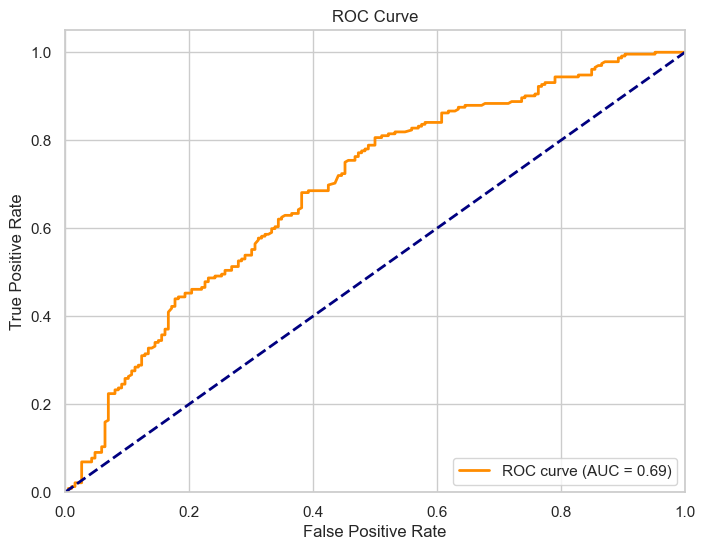

In [116]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Plot ROC curve and calculate ROC AUC for LDA

In [117]:
y_prob_lda = lda_model.predict_proba(X_test)[:, 1]
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)
roc_auc_lda = roc_auc_score(y_test, y_prob_lda)

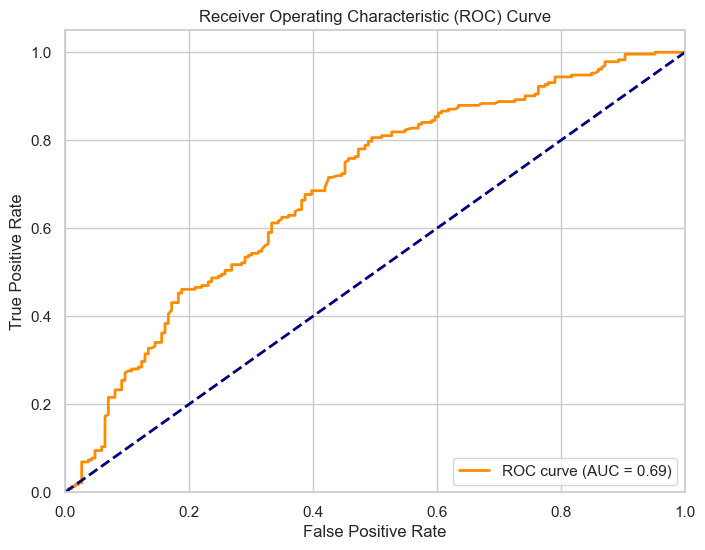

In [118]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lda, tpr_lda, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lda:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [119]:
# Print and compare the results
print('Evaluate Logistic Regression')
print('lr_accuracy = ', lr_accuracy)
print('lr_report\n', lr_report)
print('lr_confusion \n', lr_confusion)
print('roc_auc_lr = ', roc_auc_lr)

print('\nEvaluate Linear Discriminant Analysis (LDA)')
print('lda_accuracy = ', lda_accuracy)
print('lda_report\n', lda_report)
print('lda_confusion \n', lda_confusion)
print('roc_auc_lda = ', roc_auc_lda)

Evaluate Logistic Regression
lr_accuracy =  0.65311004784689
lr_report
               precision    recall  f1-score   support

           0       0.67      0.43      0.52       186
           1       0.65      0.83      0.73       232

    accuracy                           0.65       418
   macro avg       0.66      0.63      0.63       418
weighted avg       0.66      0.65      0.64       418

lr_confusion 
 [[ 80 106]
 [ 39 193]]
roc_auc_lr =  0.6878012606599926

Evaluate Linear Discriminant Analysis (LDA)
lda_accuracy =  0.6555023923444976
lda_report
               precision    recall  f1-score   support

           0       0.68      0.43      0.53       186
           1       0.65      0.84      0.73       232

    accuracy                           0.66       418
   macro avg       0.66      0.63      0.63       418
weighted avg       0.66      0.66      0.64       418

lda_confusion 
 [[ 80 106]
 [ 38 194]]
roc_auc_lda =  0.6882879124953653


**Insights:**
1. Accuracy: Both models have similar accuracy, with LDA slightly outperforming LR by a very small margin.

2. Precision and Recall: Both models have similar precision and recall values for class 0 and class 1. There are no significant differences in these metrics between the two models.

3. F1-Score: F1-scores are also quite similar for both models in both classes. Both models have a higher F1-score for class 1 compared to class 0.

4. ROC AUC: The ROC AUC values for both models are very close, with LDA having a slightly higher value. However, the difference is minimal.

**Conclusion:**

Based on the provided evaluation metrics, Logistic Regression (LR) and Linear Discriminant Analysis (LDA) perform very similarly on your dataset. Both models have almost identical accuracy, precision, recall, F1-scores, and ROC AUC scores.

### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

#### Data Understanding:

- The dataset contains both categorical and numerical values.
- There are 1473 rows and 10 columns in the dataset.
- The target variable is 'contraceptive used,' and the other columns are predictor variables.
- Out of 10 columns, 7 are of object type, 1 is of integer type, and 2 are of float type.
- Outliers are detected only in the 'number_of_children' field.
- There is a strong positive correlation between 'wife_age' and 'number_of_children_born.'
- Duplicate records (80 in total) have been identified and removed.
- Null values have been imputed with the mean.

#### Model Evaluation (Logistic Regression):

- The model performs better in predicting class 1 (positive class) with higher precision, recall, and F1-score compared to class 0 (negative class).
- It excels at identifying actual class 1 instances (higher recall) but is less precise in its predictions for class 1.
- For class 0, the model has moderate precision but struggles with recall.
- The overall model accuracy is 65.31%, indicating it's better than random guessing but with room for improvement.

#### Model Evaluation (Linear Discriminant Analysis - LDA):

- The LDA model shows performance similar to logistic regression.
- Like logistic regression, it excels in predicting class 1 with higher recall but lower precision.
- For class 0, it has moderate precision but struggles with recall.
- The overall model accuracy is 65.55%, slightly better than logistic regression.

#### Model Evaluation (CART - Classification and Regression Trees):

- The CART model achieves an accuracy of 59.81%, lower than both logistic regression and LDA.
- It shows a more balanced performance between precision and recall for both classes.
- The F1-scores for both classes are moderate.
- The model correctly predicts a significant portion of class 0 instances but struggles with class 1.

#### Model Comparison (Logistic Regression vs. LDA):

- Both LR and LDA have similar accuracy, precision, recall, F1-scores, and ROC AUC scores.
- There are no significant differences in these metrics between the two models.

#### Conclusion:

- Logistic Regression and Linear Discriminant Analysis perform similarly on the dataset, with nearly identical metrics.
- The models have reasonable but not outstanding performance, and there is room for improvement.
- Depending on the specific problem requirements, further model fine-tuning, feature engineering, or exploring other algorithms - might be necessary for better results.

## END